In [1]:
### Importing the librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Importing the warning library to avoide warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Credit Application Data

In [3]:
df = pd.read_csv('application_data.csv')

## Check the Data

In [4]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.shape

(307511, 122)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

## Data Cleaning and removing missing values

##### Finding the missing values percentage 

In [8]:
missing = df.isna().sum()/len(df)*100

##### Finding data having missing values more then 40%

In [9]:
missing_columns = list(missing[missing>40].index)

In [10]:
missing_columns

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

##### Droping data having missing values more then 40% 

In [11]:
df.drop(missing_columns, axis=1, inplace=True)

In [12]:
df.shape

(307511, 73)

In [13]:
missing2 = df.isna().sum()/len(df)*100

##### Finding data having missing values less then 40% 

In [14]:
missing2.sort_values( ascending= False).head(20)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
dtype: float64

#### Data Filling

In [15]:
df.OCCUPATION_TYPE

0            Laborers
1          Core staff
2            Laborers
3            Laborers
4          Core staff
             ...     
307506    Sales staff
307507            NaN
307508       Managers
307509       Laborers
307510       Laborers
Name: OCCUPATION_TYPE, Length: 307511, dtype: object

In [16]:
df['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [17]:
df['OCCUPATION_TYPE'].value_counts(normalize=True)*100

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

##### Replacing the NA values in Occupation Type column as Missing 

In [18]:
df['OCCUPATION_TYPE'].fillna('Missing', inplace=True)

In [19]:
df.OCCUPATION_TYPE

0            Laborers
1          Core staff
2            Laborers
3            Laborers
4          Core staff
             ...     
307506    Sales staff
307507        Missing
307508       Managers
307509       Laborers
307510       Laborers
Name: OCCUPATION_TYPE, Length: 307511, dtype: object

In [20]:
df['OCCUPATION_TYPE'].value_counts()

Missing                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [21]:
### Checking all the NA valus is removed
df.OCCUPATION_TYPE.isna().sum()

0

In [22]:
df['EXT_SOURCE_3'].value_counts()

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.021492       1
0.019468       1
0.023062       1
0.014556       1
0.043227       1
Name: EXT_SOURCE_3, Length: 814, dtype: int64

In [23]:
df['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

##### Replacing the Ext Source 3 NA values with median

In [24]:
Ext3_med = df['EXT_SOURCE_3'].median()

In [25]:
df['EXT_SOURCE_3'].fillna(Ext3_med, inplace=True)

In [26]:
df['EXT_SOURCE_3'].isna().sum()

0

#### Finding the data having missing values 13.5%

In [27]:
missing2_colume = list(missing2[(missing2>13) & (missing<14)].index)

In [28]:
missing2_colume

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [29]:
df[missing2_colume].dtypes

AMT_REQ_CREDIT_BUREAU_HOUR    float64
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
dtype: object

In [30]:
df[missing2_colume].mean()

AMT_REQ_CREDIT_BUREAU_HOUR    0.006402
AMT_REQ_CREDIT_BUREAU_DAY     0.007000
AMT_REQ_CREDIT_BUREAU_WEEK    0.034362
AMT_REQ_CREDIT_BUREAU_MON     0.267395
AMT_REQ_CREDIT_BUREAU_QRT     0.265474
AMT_REQ_CREDIT_BUREAU_YEAR    1.899974
dtype: float64

In [31]:
df[missing2_colume].median()

AMT_REQ_CREDIT_BUREAU_HOUR    0.0
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
AMT_REQ_CREDIT_BUREAU_YEAR    1.0
dtype: float64

In [32]:
df[missing2_colume].mode()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.0,0.0,0.0,0.0,0.0,0.0


#### Filling the NA values with mode in all AMT_REQ_CREDIT_BUREAU columns

In [33]:
df[missing2_colume[0]].fillna(0.0, inplace=True)
df[missing2_colume[1]].fillna(0.0, inplace=True)
df[missing2_colume[2]].fillna(0.0, inplace=True)
df[missing2_colume[3]].fillna(0.0, inplace=True)
df[missing2_colume[4]].fillna(0.0, inplace=True)
df[missing2_colume[5]].fillna(0.0, inplace=True)


In [34]:
df[missing2_colume].isna().sum()/len(df)

AMT_REQ_CREDIT_BUREAU_HOUR    0.0
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
AMT_REQ_CREDIT_BUREAU_YEAR    0.0
dtype: float64

##### Find out the missing values close to zero

In [35]:
missing3 = df.isna().sum()/len(df)*100

In [36]:
missing3.sort_values(ascending=False).head(15)

NAME_TYPE_SUITE             0.420148
DEF_60_CNT_SOCIAL_CIRCLE    0.332021
OBS_30_CNT_SOCIAL_CIRCLE    0.332021
DEF_30_CNT_SOCIAL_CIRCLE    0.332021
OBS_60_CNT_SOCIAL_CIRCLE    0.332021
EXT_SOURCE_2                0.214626
AMT_GOODS_PRICE             0.090403
AMT_ANNUITY                 0.003902
CNT_FAM_MEMBERS             0.000650
DAYS_LAST_PHONE_CHANGE      0.000325
FLAG_DOCUMENT_2             0.000000
FLAG_DOCUMENT_10            0.000000
EXT_SOURCE_3                0.000000
FLAG_DOCUMENT_3             0.000000
FLAG_DOCUMENT_4             0.000000
dtype: float64

In [37]:
missing3_column = list(missing3[(missing3<1)& (missing3>0)].index)

In [38]:
missing3_column

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

#### Droping all the rows of the column having missing values close to zero percentage because they are very small in percentage

In [39]:
df= df[~df[missing3_column[0]].isna()]

In [40]:
df= df[~df[missing3_column[1]].isna()]
df= df[~df[missing3_column[2]].isna()]
df= df[~df[missing3_column[3]].isna()]
df= df[~df[missing3_column[4]].isna()]
df= df[~df[missing3_column[5]].isna()]
df= df[~df[missing3_column[6]].isna()]
df= df[~df[missing3_column[7]].isna()]
df= df[~df[missing3_column[8]].isna()]
df= df[~df[missing3_column[9]].isna()]

In [41]:
#### Did any NA values left
df[missing3_column].isna().sum()

AMT_ANNUITY                 0
AMT_GOODS_PRICE             0
NAME_TYPE_SUITE             0
CNT_FAM_MEMBERS             0
EXT_SOURCE_2                0
OBS_30_CNT_SOCIAL_CIRCLE    0
DEF_30_CNT_SOCIAL_CIRCLE    0
OBS_60_CNT_SOCIAL_CIRCLE    0
DEF_60_CNT_SOCIAL_CIRCLE    0
DAYS_LAST_PHONE_CHANGE      0
dtype: int64

In [42]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,304531.000000,304531.000000,304531.000000,3.045310e+05,3.045310e+05,304531.000000,3.045310e+05,304531.000000,304531.000000,304531.000000,...,304531.000000,304531.000000,304531.000000,304531.000000,304531.000000,304531.000000,304531.000000,304531.000000,304531.000000,304531.000000
mean,278171.558800,0.081000,0.417140,1.686634e+05,5.995592e+05,27146.369655,5.384949e+05,0.020842,-16040.509915,63831.232423,...,0.007851,0.000575,0.000496,0.000328,0.005523,0.006039,0.029829,0.231635,0.230203,1.648630
std,102782.532925,0.272836,0.722308,2.378910e+05,4.021453e+05,14480.104699,3.690524e+05,0.013808,4361.978717,141291.148422,...,0.088260,0.023965,0.022262,0.018118,0.077957,0.102667,0.190669,0.856216,0.745648,1.856842
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189138.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16573.500000,2.385000e+05,0.010006,-19682.000000,-2762.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278193.000000,0.000000,0.000000,1.476000e+05,5.172660e+05,24939.000000,4.500000e+05,0.018850,-15755.000000,-1215.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367136.000000,0.000000,1.000000,2.025000e+05,8.086500e+05,34641.000000,6.795000e+05,0.028663,-12418.000000,-290.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


##### Binning

In [43]:
df['Income_Group'] = pd.qcut(df['AMT_INCOME_TOTAL'], 
                            q= [0,0.1,0.3,0.6,0.8,1], 
                            labels= ['Below Average', 'Average', 'Above Average', 'Good', 'High'])


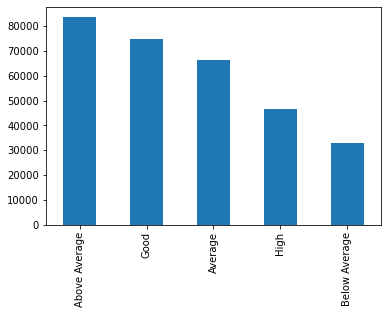

In [44]:
df.Income_Group.value_counts().plot.bar()
plt.show()

The person having above average and good income are more no. of presons who apply for loan as compair to high and below average income.

In [45]:
df['Credit_group'] = pd.qcut(df['AMT_CREDIT'], 
                            q= [0,0.1,0.3,0.6,0.8,1], 
                            labels= ['Below Average', 'Average', 'Above Average', 'Good', 'High'])

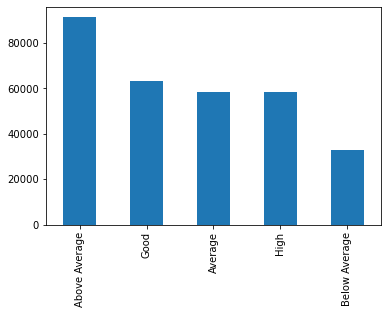

In [46]:
df.Credit_group.value_counts().plot.bar()
plt.show()

In [47]:
df.DAYS_BIRTH.describe()

count    304531.000000
mean     -16040.509915
std        4361.978717
min      -25229.000000
25%      -19682.000000
50%      -15755.000000
75%      -12418.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [48]:
df['Age']= abs(df.DAYS_BIRTH)//365

In [49]:
df['Age_group'] = pd.cut((df.Age), [0,30,40,50,60,100], labels=['0-30', '30-40', '40-50','50-60','60-100'])

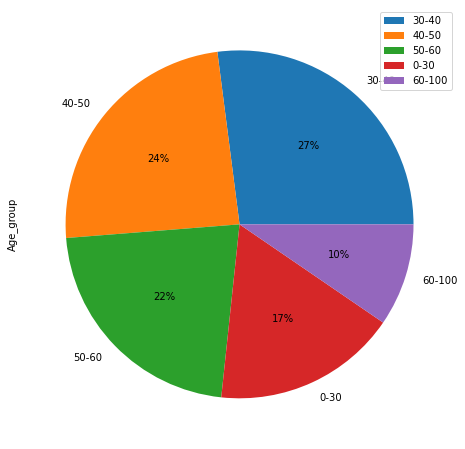

In [50]:
(df.Age_group.value_counts(normalize=True)*100).plot.pie(figsize=(19,8), autopct='%1.f%%')
plt.legend()
plt.show()

People age between 30-40 are more in number who apply for loan.

### Finding Outliers

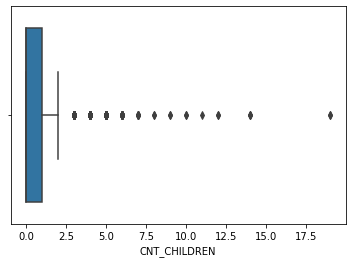

In [51]:
sns.boxplot(df.CNT_CHILDREN)
plt.show()

In CNT_Children column there are some outliers as it is showing some people have more then 17 childrens.

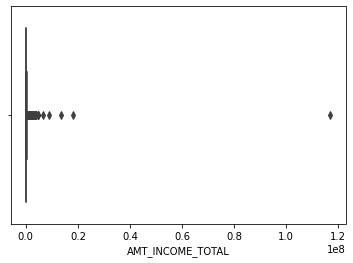

In [52]:
sns.boxplot(df.AMT_INCOME_TOTAL)
plt.show()

AMT_Income_Total has one outlier.

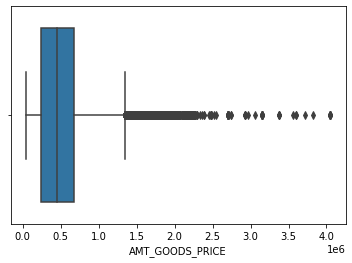

In [53]:
sns.boxplot(df.AMT_GOODS_PRICE)
plt.show()

Goods price have some outliers values as some values are very high.

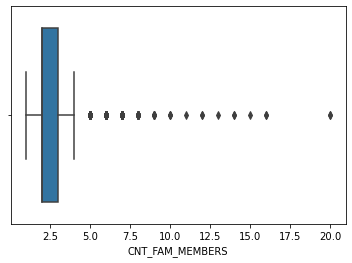

In [54]:
sns.boxplot(df.CNT_FAM_MEMBERS)
plt.show()

Family memders column have some outliers values as it is showing that some family have 15 members.

## Analysis

##### Checking the Imbalance Percentage

In [55]:
df.TARGET.value_counts(normalize=True)*100

0    91.900004
1     8.099996
Name: TARGET, dtype: float64

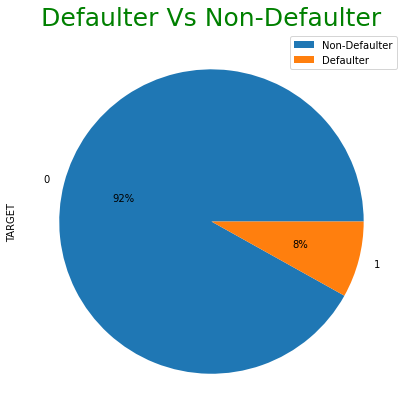

In [56]:
df.TARGET.value_counts(normalize=True).plot.pie(figsize=(15,7), autopct='%1.f%%')
plt.legend(['Non-Defaulter', 'Defaulter'])
plt.title('Defaulter Vs Non-Defaulter',fontdict={'fontsize': 25, 'fontweight': 5,  'color':'Green'})
plt.show()

92% of people are Non - Defaulter and only 8% people are Defaulter.

### Univariate Analysis 

In [57]:
df.CODE_GENDER.value_counts()

F      200482
M      104045
XNA         4
Name: CODE_GENDER, dtype: int64

##### Replacing the XNA values to F as in the Gender category Female are in maximum in number.

In [58]:
df.CODE_GENDER = df.CODE_GENDER.replace('XNA','F')

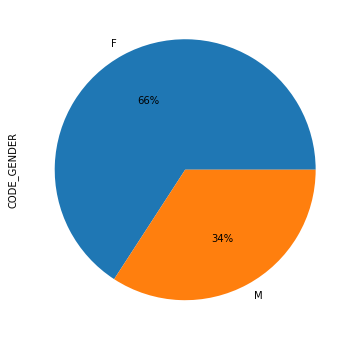

In [59]:
(df.CODE_GENDER.value_counts(normalize=True)*100).plot.pie(figsize=(9,6),autopct='%1.f%%')

plt.show()

66% are female who apply for loan

### Breaking the dataset on the basis of Terget values

In [60]:
df_D = df[df['TARGET']==1]
df_ND = df[df['TARGET']==0]

In [61]:
df_D.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Income_Group,Credit_group,Age,Age_group
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,1.0,Good,Above Average,25,0-30
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0.0,0.0,0.0,0.0,2.0,2.0,Average,High,51,50-60
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0.0,0.0,0.0,2.0,0.0,4.0,Good,High,47,40-50


In [62]:
df_ND.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Income_Group,Credit_group,Age,Age_group
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,High,High,45,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Below Average,Below Average,52,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,0.0,Above Average,Above Average,52,50-60


#### Gender Comparison between Defaulter and Non-Defaulter 

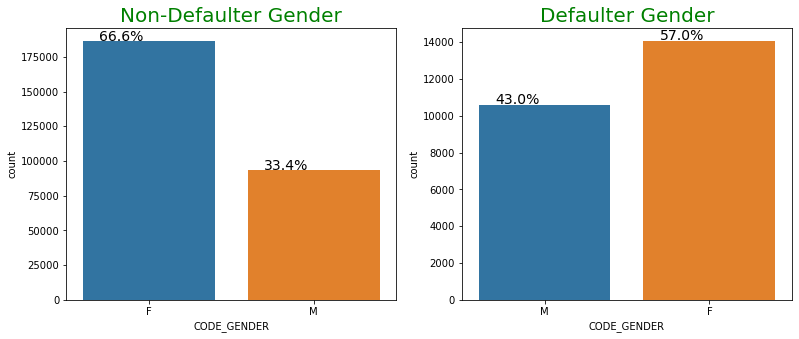

In [63]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('Non-Defaulter Gender', fontdict={'fontsize': 20, 'fontweight': 5,  'color':'Green'})
ax1 = sns.countplot(x= 'CODE_GENDER', data=df_ND)

for p in ax1.patches:
    ax1.annotate('{:.1f}%'.format((p.get_height()/len(df_ND))*100), (p.get_x()+0.1, p.get_height()+50),fontsize = 14)
    
plt.subplot(1,2,2)
plt.title('Defaulter Gender', fontdict={'fontsize': 20, 'fontweight': 5,  'color':'Green'})
ax2= sns.countplot(x= 'CODE_GENDER', data=df_D )

for p in ax2.patches:
    ax2.annotate('{:.1f}%'.format((p.get_height()/len(df_D))*100), (p.get_x()+0.1, p.get_height()+50),fontsize = 14)

plt.show()

Male are more defaulter as percentage is incresed as compared to Non defaulter.

#### Income

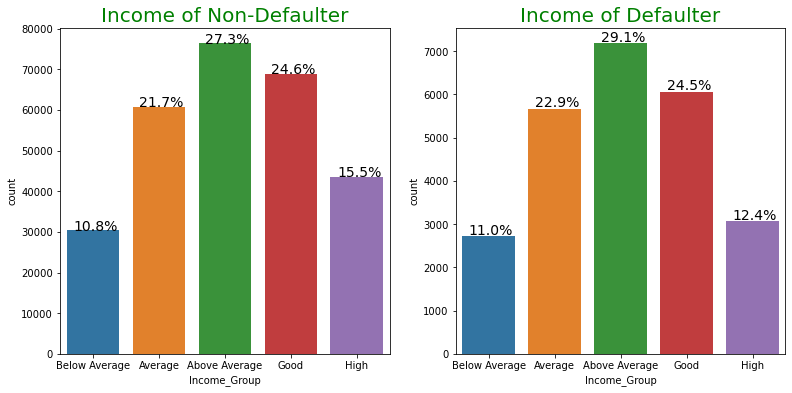

In [64]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
plt.title('Income of Non-Defaulter', fontdict={'fontsize': 20, 'fontweight': 5,  'color':'Green'})
ax1= sns.countplot(x= 'Income_Group', data=df_ND)
for p in ax1.patches:
    ax1.annotate('{:.1f}%'.format((p.get_height()/len(df_ND))*100), (p.get_x()+0.1, p.get_height()+50),fontsize = 14)
    
plt.subplot(1,2,2)
plt.title('Income of Defaulter', fontdict={'fontsize': 20, 'fontweight': 5,  'color':'Green'})
ax2= sns.countplot(x= 'Income_Group', data=df_D )
for p in ax2.patches:
    ax2.annotate('{:.1f}%'.format((p.get_height()/len(df_D))*100), (p.get_x()+0.1, p.get_height()+50),fontsize = 14)

plt.show()

People having Above average income are higher as a defaulter and people having High income are less chance to be a Defaulter.

#### Age Group

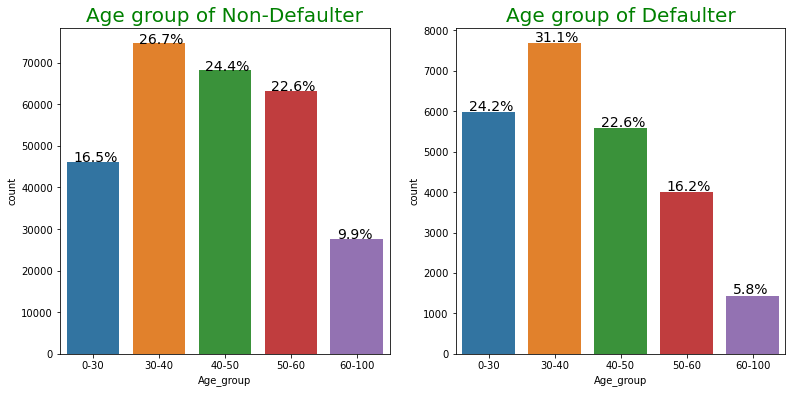

In [65]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
plt.title('Age group of Non-Defaulter', fontdict={'fontsize': 20, 'fontweight': 5,  'color':'Green'})
ax1=sns.countplot(x= 'Age_group', data=df_ND)
for p in ax1.patches:
    ax1.annotate('{:.1f}%'.format((p.get_height()/len(df_ND))*100), (p.get_x()+0.1, p.get_height()+50),fontsize = 14)
    
plt.subplot(1,2,2)
plt.title('Age group of Defaulter', fontdict={'fontsize': 20, 'fontweight': 5,  'color':'Green'})
ax2= sns.countplot(x= 'Age_group', data=df_D )
for p in ax2.patches:
    ax2.annotate('{:.1f}%'.format((p.get_height()/len(df_D))*100), (p.get_x()+0.1, p.get_height()+50),fontsize = 14)
plt.show()

People having Age group of 0-30 and 30*40 years are more defaulter and as the age increases change of defaulter is decrease.

#### Income Type

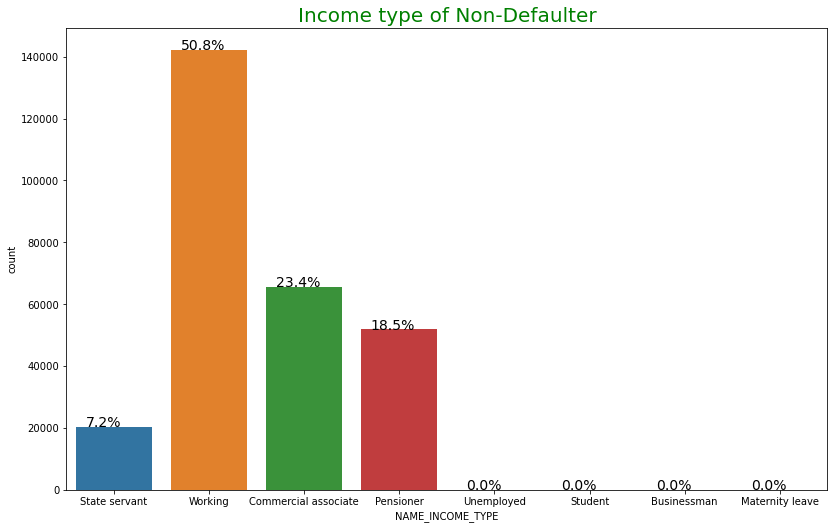

In [66]:
plt.figure(figsize=(30,8.5))
plt.subplot(1,2,1)
plt.title('Income type of Non-Defaulter', fontdict={'fontsize': 20, 'fontweight': 5,  'color':'Green'})
ax1= sns.countplot(x= 'NAME_INCOME_TYPE', data=df_ND)
for p in ax1.patches:
    ax1.annotate('{:.1f}%'.format((p.get_height()/len(df_ND))*100), (p.get_x()+0.1, p.get_height()+50),fontsize = 14)
plt.show()

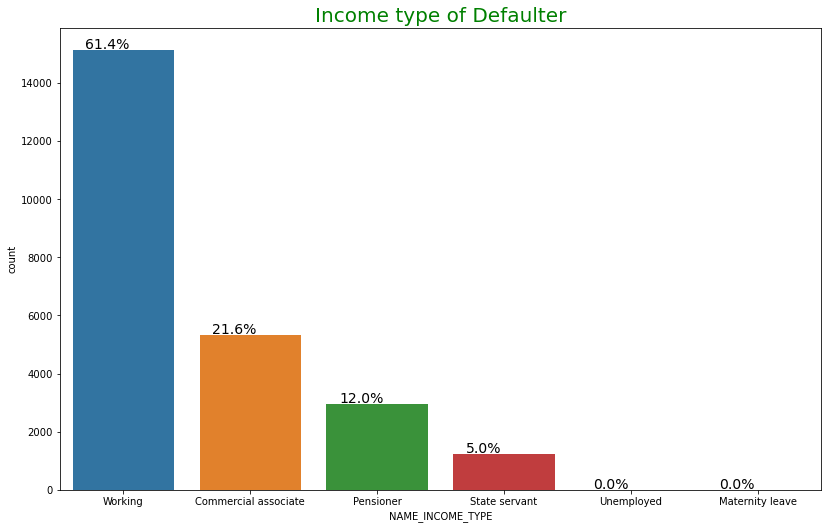

In [67]:
plt.figure(figsize=(30,8.5))
plt.subplot(1,2,2)
plt.title('Income type of Defaulter', fontdict={'fontsize': 20, 'fontweight': 5,  'color':'Green'})
ax2 = sns.countplot(x= 'NAME_INCOME_TYPE', data=df_D )
for p in ax2.patches:
    ax2.annotate('{:.1f}%'.format((p.get_height()/len(df_D))*100), (p.get_x()+0.1, p.get_height()+50),fontsize = 14)
plt.show()

The peolpe who are working are more defaulter as compared to other catalogue.

#### Education Type

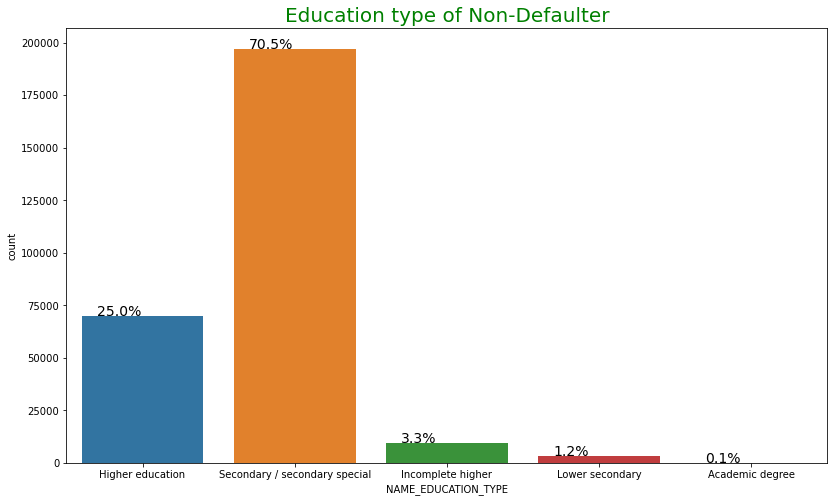

In [68]:
plt.figure(figsize=(30,8))
plt.subplot(1,2,1)
plt.title('Education type of Non-Defaulter', fontdict={'fontsize': 20, 'fontweight': 5,  'color':'Green'})
ax1 = sns.countplot(x= 'NAME_EDUCATION_TYPE', data=df_ND)
for p in ax1.patches:
    ax1.annotate('{:.1f}%'.format((p.get_height()/len(df_ND))*100), (p.get_x()+0.1, p.get_height()+50),fontsize = 14)
plt.show()

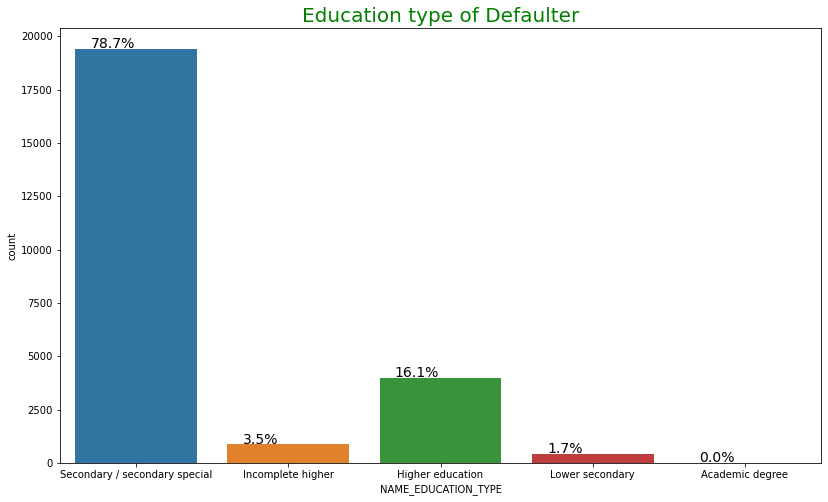

In [69]:
plt.figure(figsize=(30,8))
plt.subplot(1,2,2)
plt.title('Education type of Defaulter', fontdict={'fontsize': 20, 'fontweight': 5,  'color':'Green'})
ax2= sns.countplot(x= 'NAME_EDUCATION_TYPE', data=df_D )
for p in ax2.patches:
    ax2.annotate('{:.1f}%'.format((p.get_height()/len(df_D))*100), (p.get_x()+0.1, p.get_height()+50),fontsize = 14)
plt.show()

People having Secondary education are the most who are defaulter and people having Academic degree never defaulted.

#### Family Status

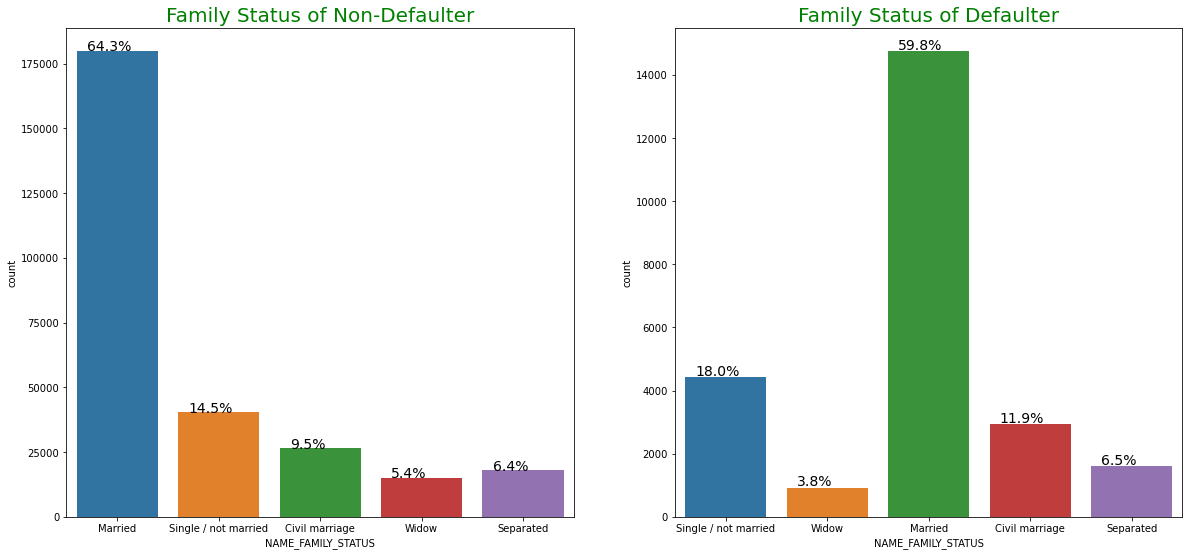

In [70]:
plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
plt.title('Family Status of Non-Defaulter', fontdict={'fontsize': 20, 'fontweight': 5,  'color':'Green'})
ax1 = sns.countplot(x= 'NAME_FAMILY_STATUS', data=df_ND)
for p in ax1.patches:
    ax1.annotate('{:.1f}%'.format((p.get_height()/len(df_ND))*100), (p.get_x()+0.1, p.get_height()+50),fontsize = 14)
    
plt.subplot(1,2,2)
plt.title('Family Status of Defaulter', fontdict={'fontsize': 20, 'fontweight': 5,  'color':'Green'})
ax2 = sns.countplot(x= 'NAME_FAMILY_STATUS', data=df_D )
for p in ax2.patches:
    ax2.annotate('{:.1f}%'.format((p.get_height()/len(df_D))*100), (p.get_x()+0.1, p.get_height()+50),fontsize = 14)

plt.show()

Married people are the most who are defaulted and Single person's percentage is incresed by 4% as compared to Non defaulter.

#### House Type

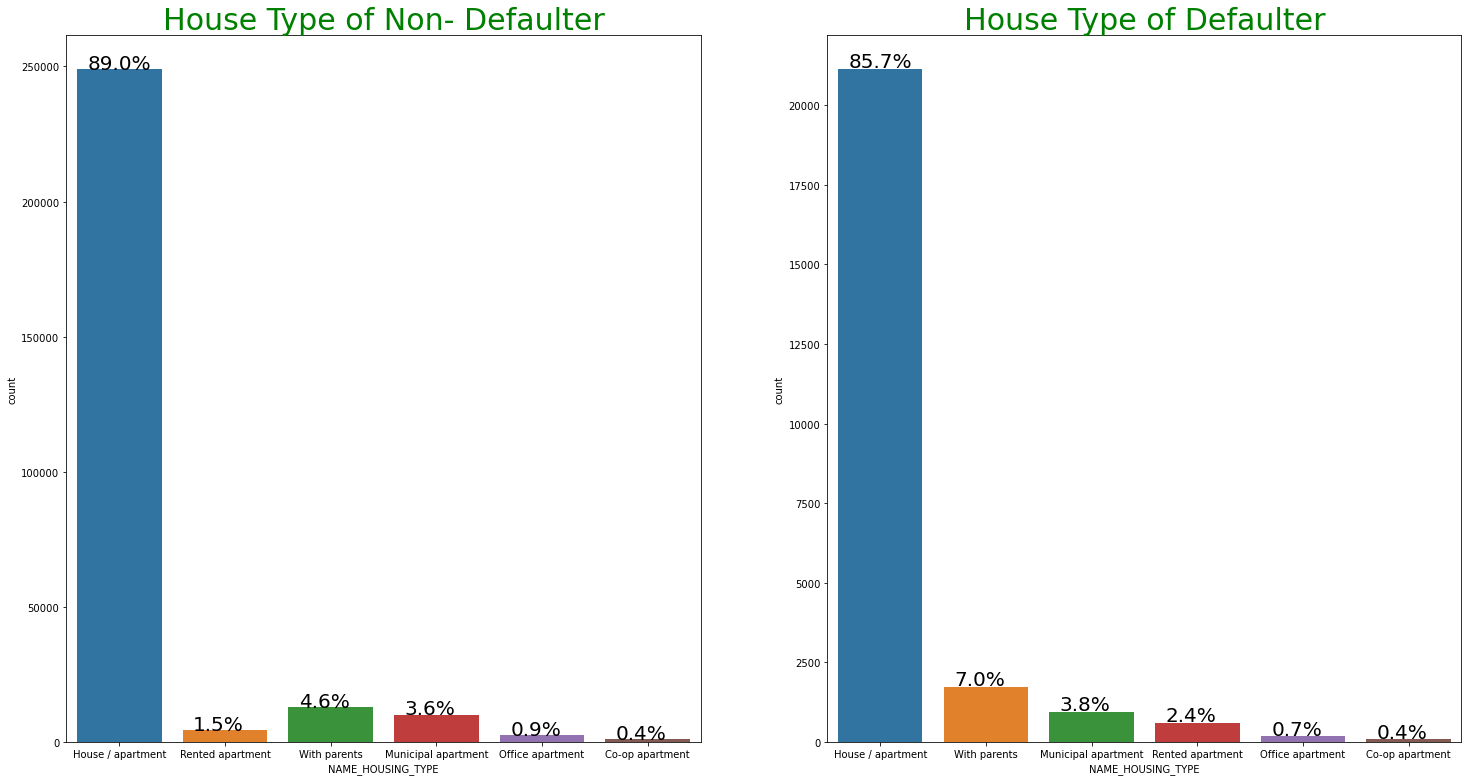

In [104]:
plt.figure(figsize=(25,13))
plt.subplot(1,2,1)
plt.title('House Type of Non- Defaulter', fontdict={'fontsize': 30, 'fontweight': 5,  'color':'Green'})
ax1 = sns.countplot(x= 'NAME_HOUSING_TYPE', data=df_ND )
for p in ax1.patches:
    ax1.annotate('{:.1f}%'.format((p.get_height()/len(df_ND))*100), (p.get_x()+0.1, p.get_height()+50),fontsize = 20)
    
plt.subplot(1,2,2)
plt.title('House Type of Defaulter', fontdict={'fontsize': 30, 'fontweight': 5,  'color':'Green'})
ax2= sns.countplot(x= 'NAME_HOUSING_TYPE', data=df_D )
for p in ax2.patches:
    ax2.annotate('{:.1f}%'.format((p.get_height()/len(df_D))*100), (p.get_x()+0.1, p.get_height()+50),fontsize = 20)

plt.show()

The people who live with parnets are increased in percentage as compared to Non defaulter.

#### Loan Type

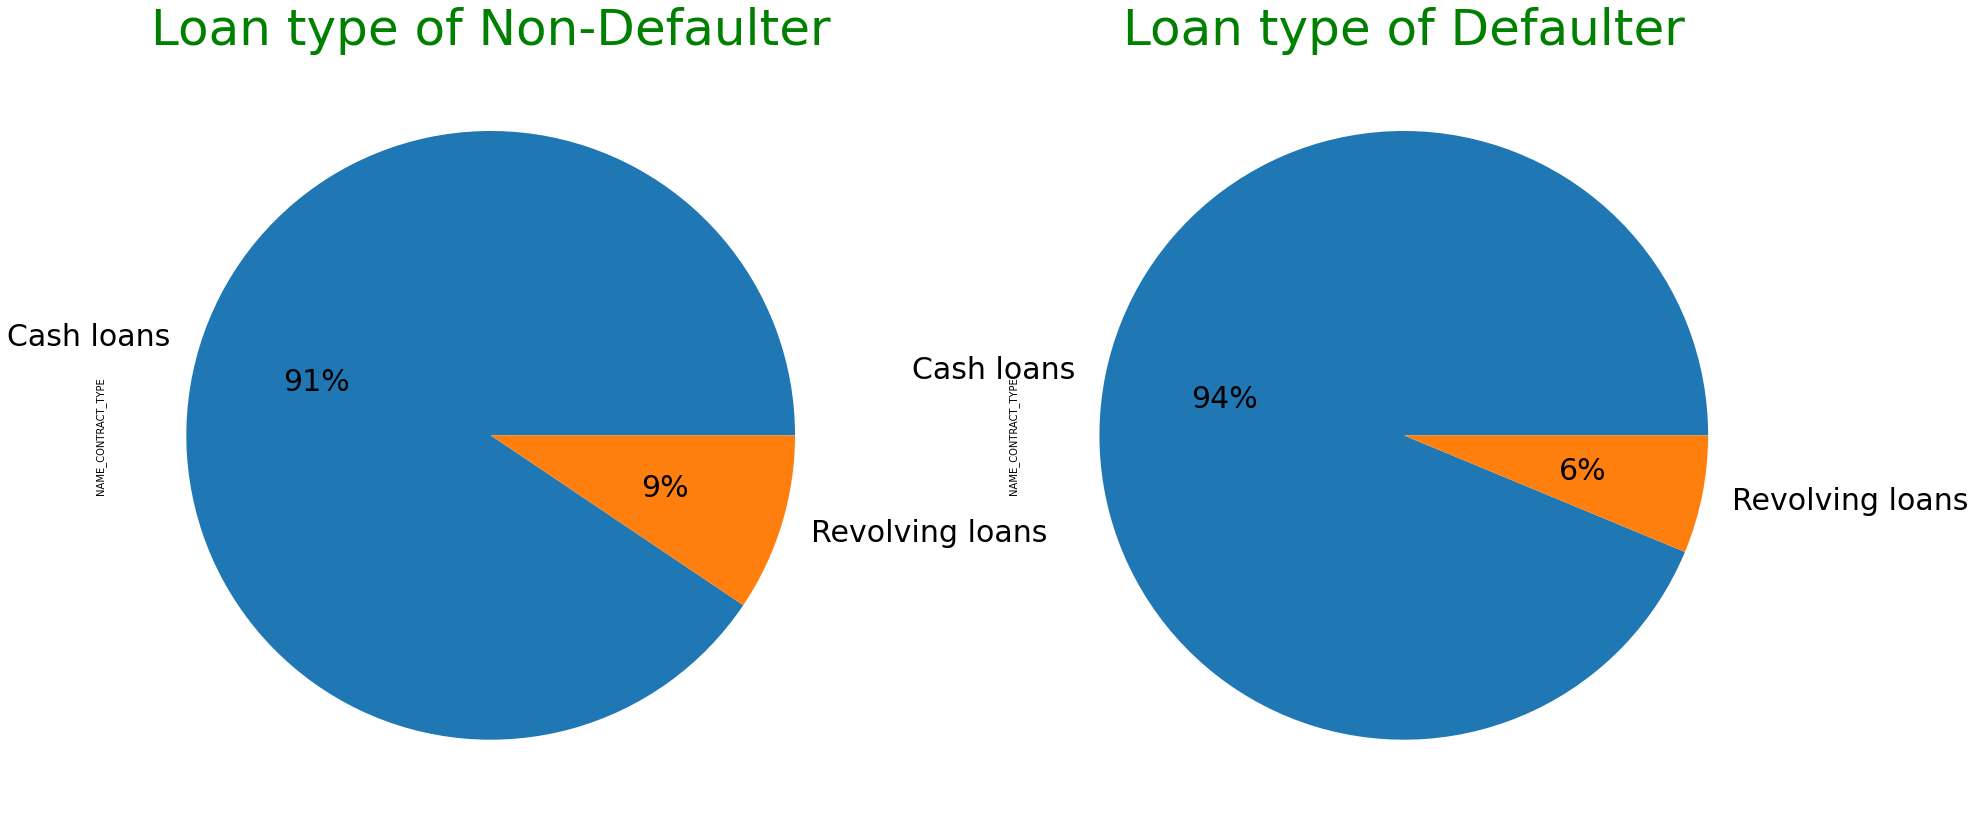

In [72]:
plt.subplot(1,2,1)
plt.title('Loan type of Non-Defaulter', fontdict={'fontsize': 50, 'fontweight': 10,  'color':'Green'})
(df_ND.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100).plot.pie(figsize=(30,15),autopct='%1.f%%', fontsize= 30)

plt.subplot(1,2,2)
plt.title('Loan type of Defaulter', fontdict={'fontsize': 50, 'fontweight': 10,  'color':'Green'})
(df_D.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100).plot.pie(figsize=(30,15),autopct='%1.f%%', fontsize= 30)


plt.show()

Cash loans type customers increased by 91% to 94% as defaulter.

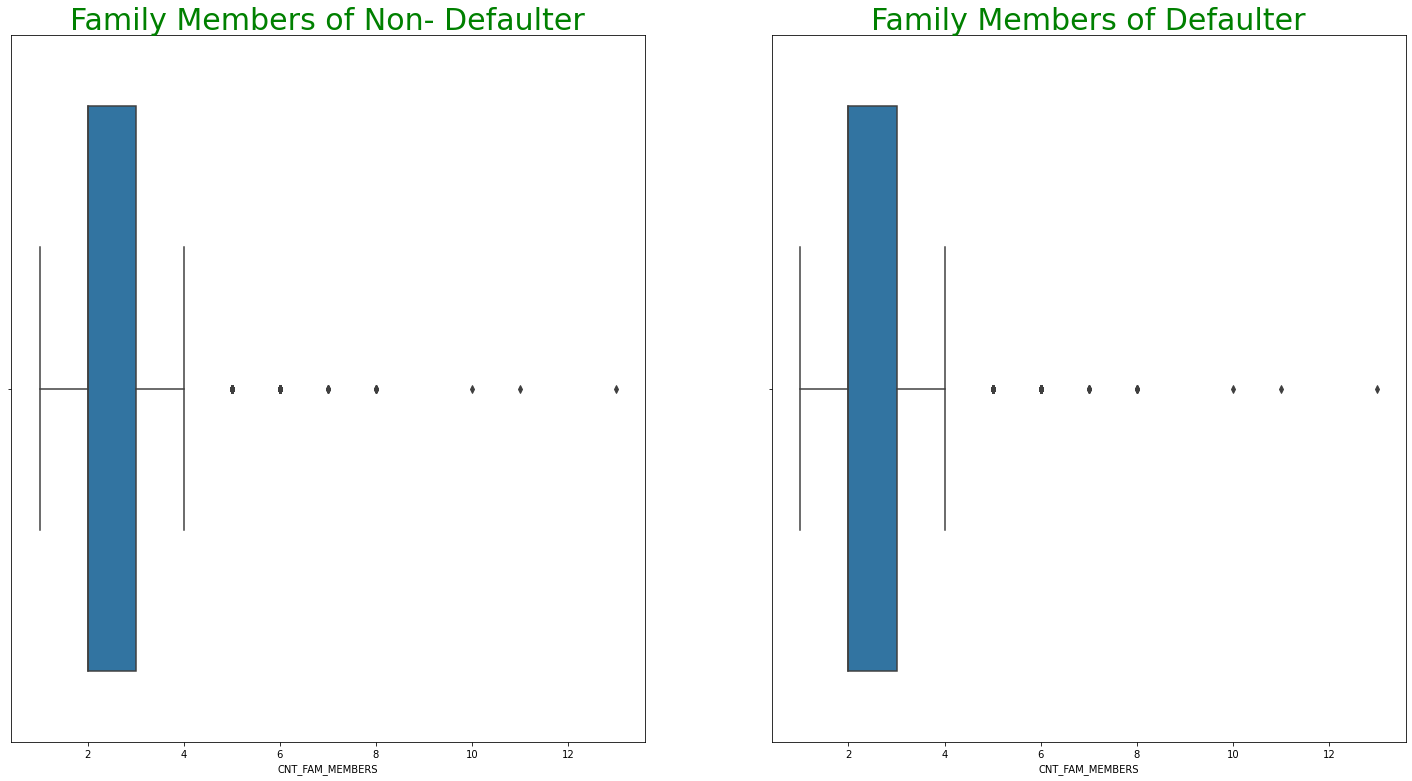

In [73]:
plt.figure(figsize=(25,13))
plt.subplot(1,2,1)
plt.title('Family Members of Non- Defaulter', fontdict={'fontsize': 30, 'fontweight': 5,  'color':'Green'})
sns.boxplot(x= 'CNT_FAM_MEMBERS', data=df_D )

plt.subplot(1,2,2)
plt.title('Family Members of Defaulter', fontdict={'fontsize': 30, 'fontweight': 5,  'color':'Green'})
sns.boxplot(x= 'CNT_FAM_MEMBERS', data=df_D )

plt.show()

After 4 there are some outliers. And most of have 2 to 3 members in the family.

#### Occupation Type

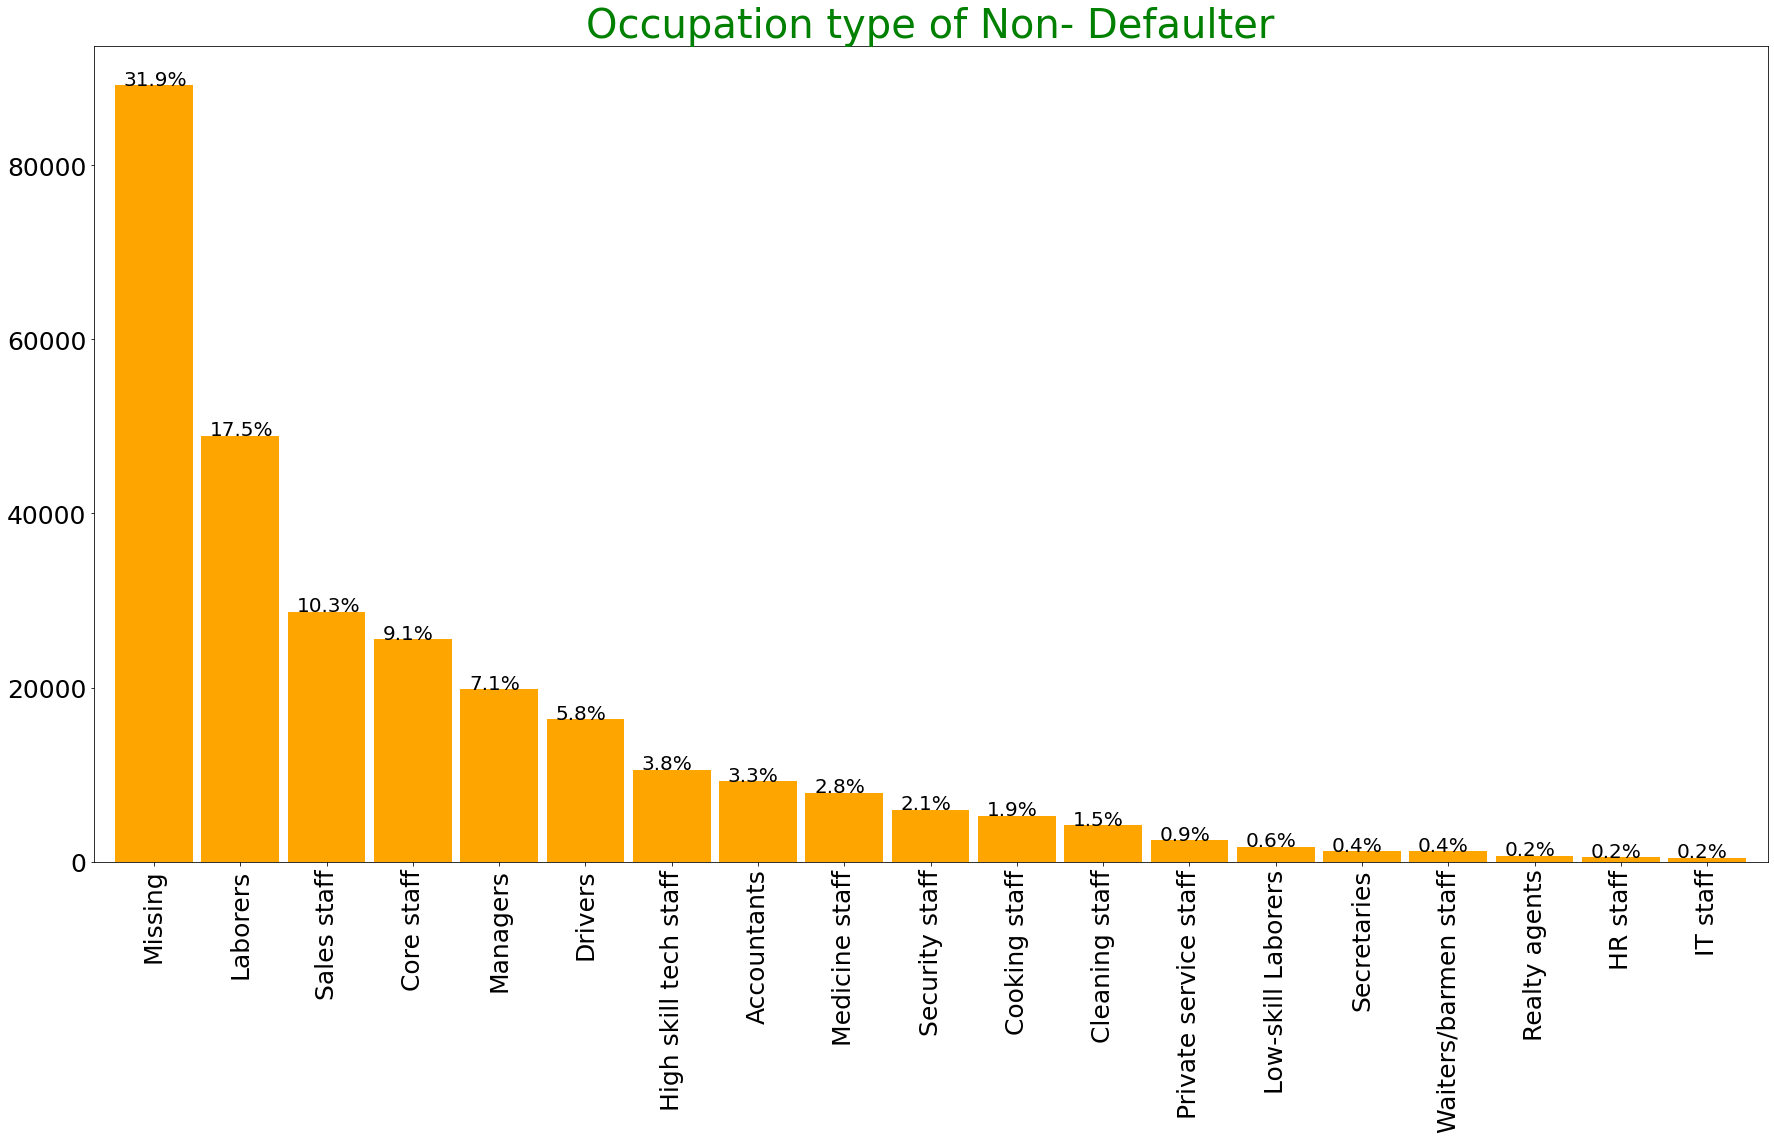

In [74]:
plt.figure(figsize=(30,15))
ax1 = df_ND.OCCUPATION_TYPE.value_counts().plot.bar(width= 0.9, fontsize= 25, color = 'Orange')
plt.title('Occupation type of Non- Defaulter', fontdict={'fontsize': 40, 'fontweight': 5,  'color':'Green'})

for p in ax1.patches:
    ax1.annotate('{:.1f}%'.format((p.get_height()/len(df_ND))*100), (p.get_x()+0.1, p.get_height()+50),fontsize = 20)
    
plt.show()

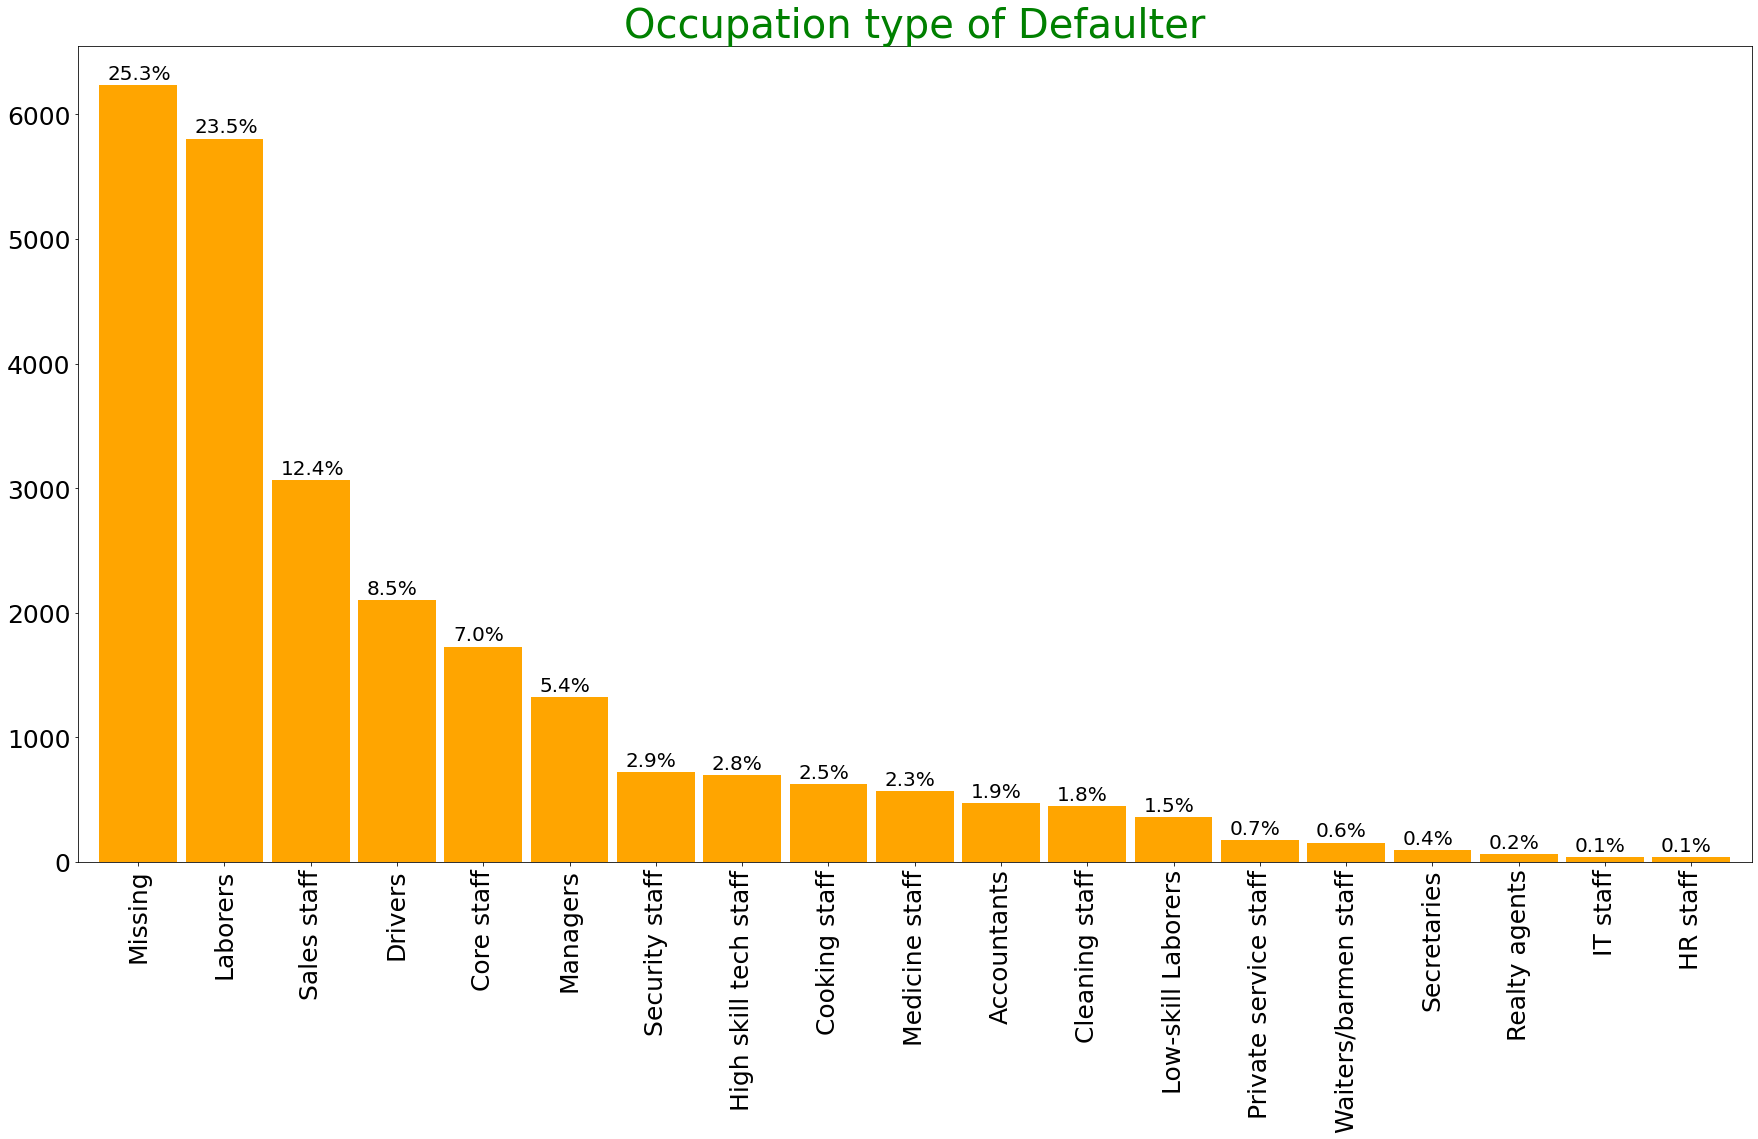

In [75]:
plt.figure(figsize=(30,15))
ax2= df_D.OCCUPATION_TYPE.value_counts().plot.bar(width= 0.9, fontsize= 25, color = 'Orange')
plt.title('Occupation type of Defaulter', fontdict={'fontsize': 40, 'fontweight': 5,  'color':'Green'})
for p in ax2.patches:
    ax2.annotate('{:.1f}%'.format((p.get_height()/len(df_D))*100), (p.get_x()+0.1, p.get_height()+50),fontsize = 20)

plt.show()

Laborers and Drivers are increased as defaulter in comparesion with Non defaulter.

#### Organization Type

In [76]:
df_ND.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    60980
XNA                       51885
Self-employed             34166
Other                     15277
Medicine                  10347
Government                 9585
Business Entity Type 2     9569
School                     8298
Trade: type 7              7033
Kindergarten               6342
Construction               5878
Business Entity Type 1     5435
Transport: type 4          4855
Industry: type 9           3105
Trade: type 3              3088
Industry: type 3           2907
Security                   2894
Housing                    2701
Military                   2475
Industry: type 11          2451
Bank                       2326
Police                     2202
Agriculture                2182
Transport: type 2          2014
Postal                     1957
Security Ministries        1857
Trade: type 2              1740
Restaurant                 1584
Services                   1458
University                 1246
Industry: type 7           1190
Transpor

In [77]:
### Replacing the XNA values with NaN from both Defaulter and Non-Defaulter data set 
df_ND.ORGANIZATION_TYPE=df_ND.ORGANIZATION_TYPE.replace('XNA', np.NaN)
df_D.ORGANIZATION_TYPE=df_D.ORGANIZATION_TYPE.replace('XNA', np.NaN)

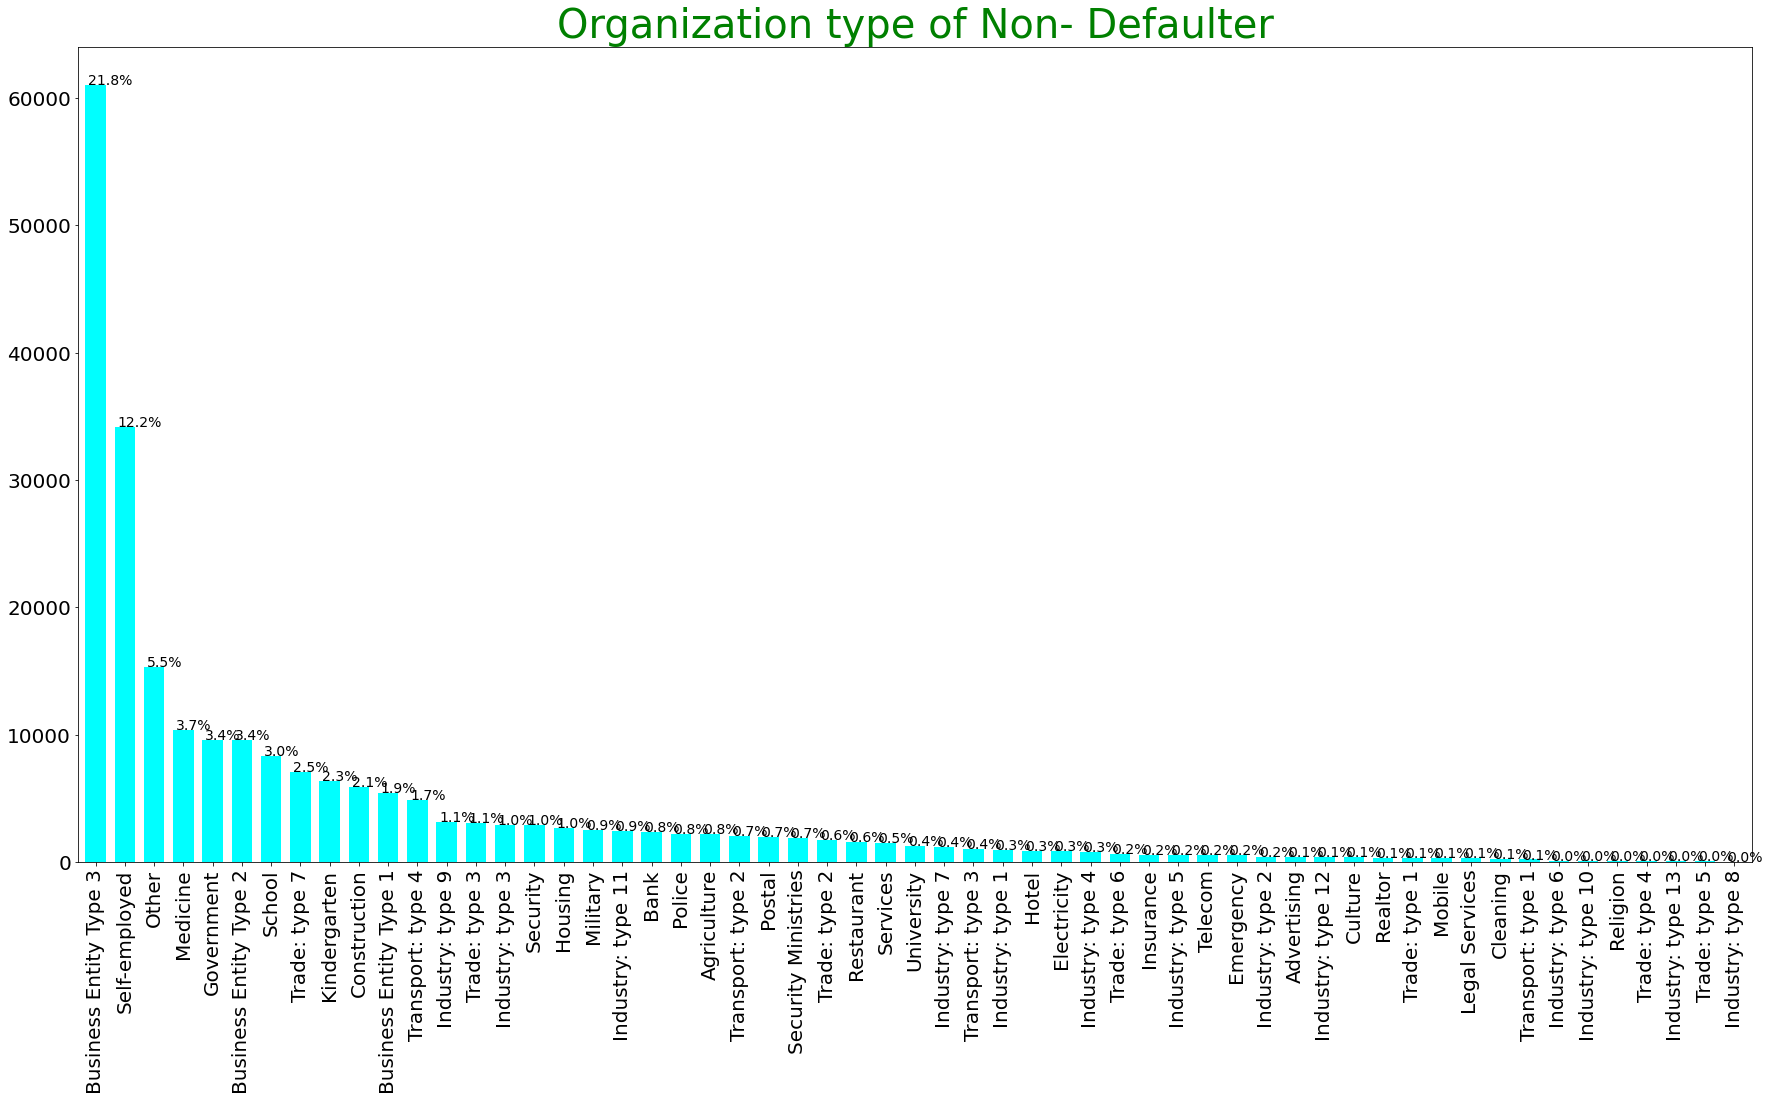

In [78]:
plt.figure(figsize=(30,15))
ax1= df_ND.ORGANIZATION_TYPE.value_counts().plot.bar(width= 0.7, fontsize= 20, color = 'Cyan')
plt.title('Organization type of Non- Defaulter', fontdict={'fontsize': 40, 'fontweight': 5,  'color':'Green'})
for p in ax1.patches:
    ax1.annotate('{:.1f}%'.format((p.get_height()/len(df_ND))*100), (p.get_x()+0.1, p.get_height()+50),fontsize = 14)
plt.show()

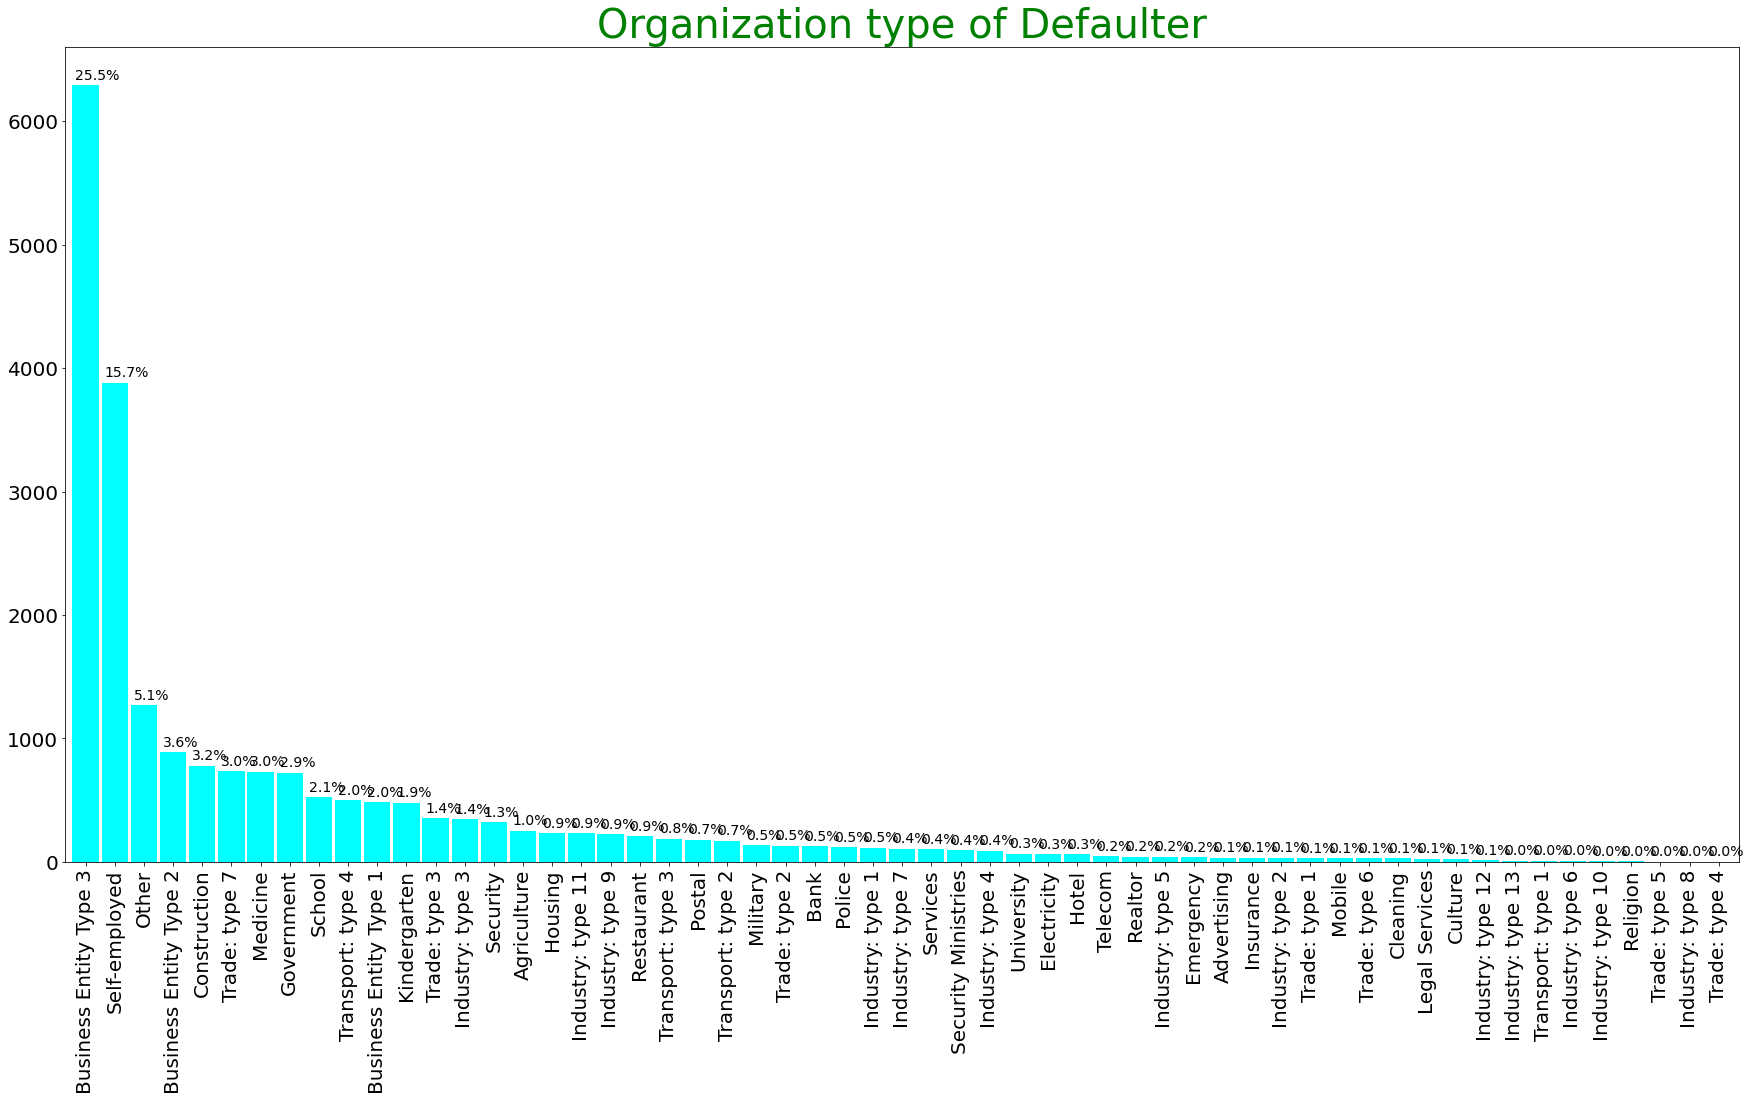

In [79]:
plt.figure(figsize=(30,15))
ax2 = df_D.ORGANIZATION_TYPE.value_counts().plot.bar(width= 0.9, fontsize= 20, color = 'Cyan')
plt.title('Organization type of Defaulter', fontdict={'fontsize': 40, 'fontweight': 5,  'color':'Green'})
for p in ax2.patches:
    ax2.annotate('{:.1f}%'.format((p.get_height()/len(df_D))*100), (p.get_x()+0.1, p.get_height()+50),fontsize = 14)
plt.show()

Business Entity Type 3 are more defaulter

#### Annuity

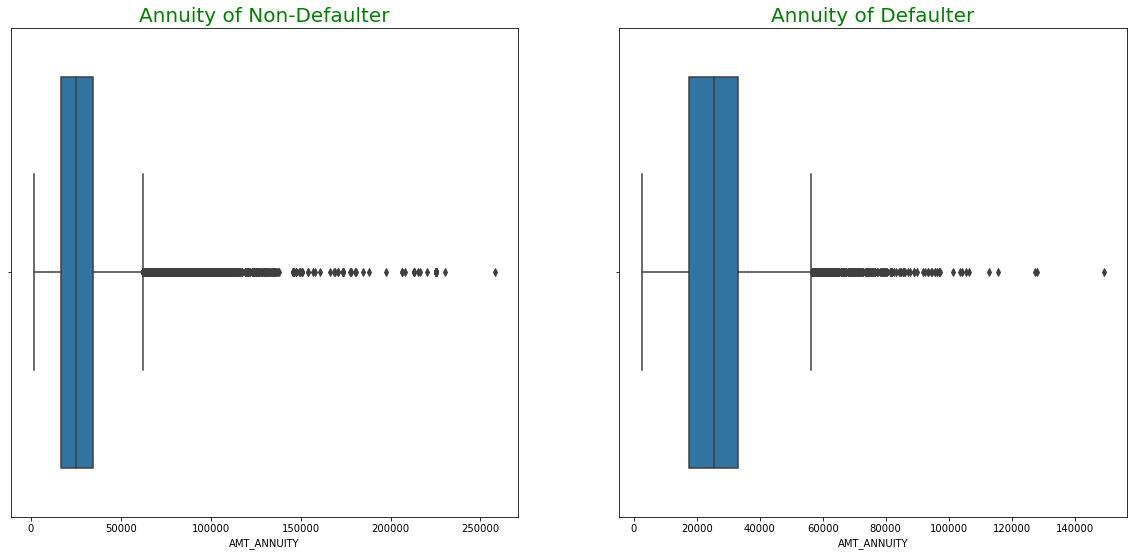

In [80]:
plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
plt.title('Annuity of Non-Defaulter', fontdict={'fontsize': 20, 'fontweight': 5,  'color':'Green'})
sns.boxplot(x= 'AMT_ANNUITY', data=df_ND)

plt.subplot(1,2,2)
plt.title('Annuity of Defaulter', fontdict={'fontsize': 20, 'fontweight': 5,  'color':'Green'})
sns.boxplot(x= 'AMT_ANNUITY', data=df_D )

plt.show()

There are some outliers present in Annuity.

#### Credit Amount

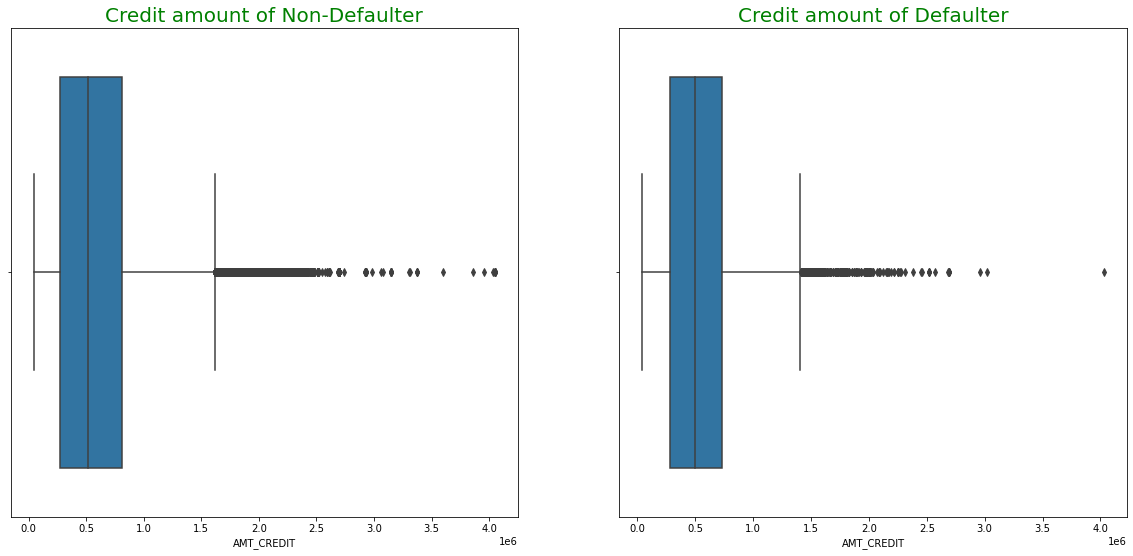

In [81]:
plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
plt.title('Credit amount of Non-Defaulter', fontdict={'fontsize': 20, 'fontweight': 5,  'color':'Green'})
sns.boxplot(x= 'AMT_CREDIT', data=df_ND)

plt.subplot(1,2,2)
plt.title('Credit amount of Defaulter', fontdict={'fontsize': 20, 'fontweight': 5,  'color':'Green'})
sns.boxplot(x= 'AMT_CREDIT', data=df_D )

plt.show()

## Bivariate Analysis

#### Age Group vs Credit

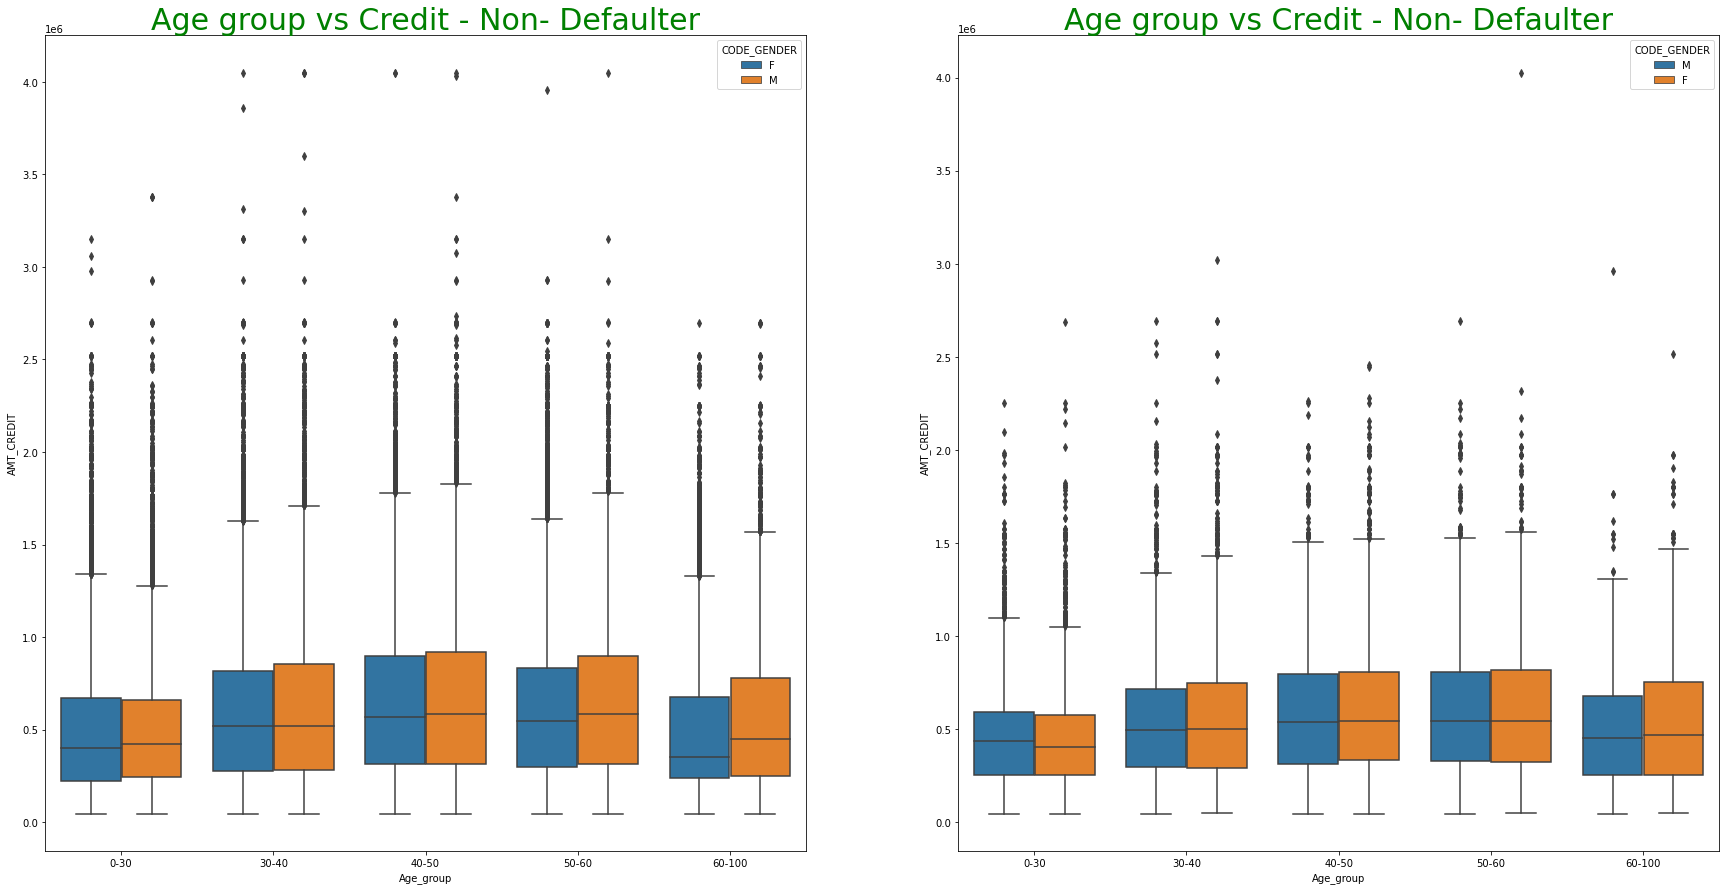

In [106]:
plt.figure(figsize=(30,15))
plt.subplot(1,2,1)
plt.title('Age group vs Credit - Non- Defaulter', fontdict={'fontsize': 30, 'fontweight': 5,  'color':'Green'})
sns.boxplot(x= 'Age_group', y= 'AMT_CREDIT', hue ='CODE_GENDER',data=df_ND)

plt.subplot(1,2,2)
plt.title('Age group vs Credit - Non- Defaulter', fontdict={'fontsize': 30, 'fontweight': 5,  'color':'Green'})
sns.boxplot(x= 'Age_group', y= 'AMT_CREDIT', hue ='CODE_GENDER',data=df_D)

plt.show()

Females number are increased in every age group as compared to Non defaulter.

### Good Price vs Credit

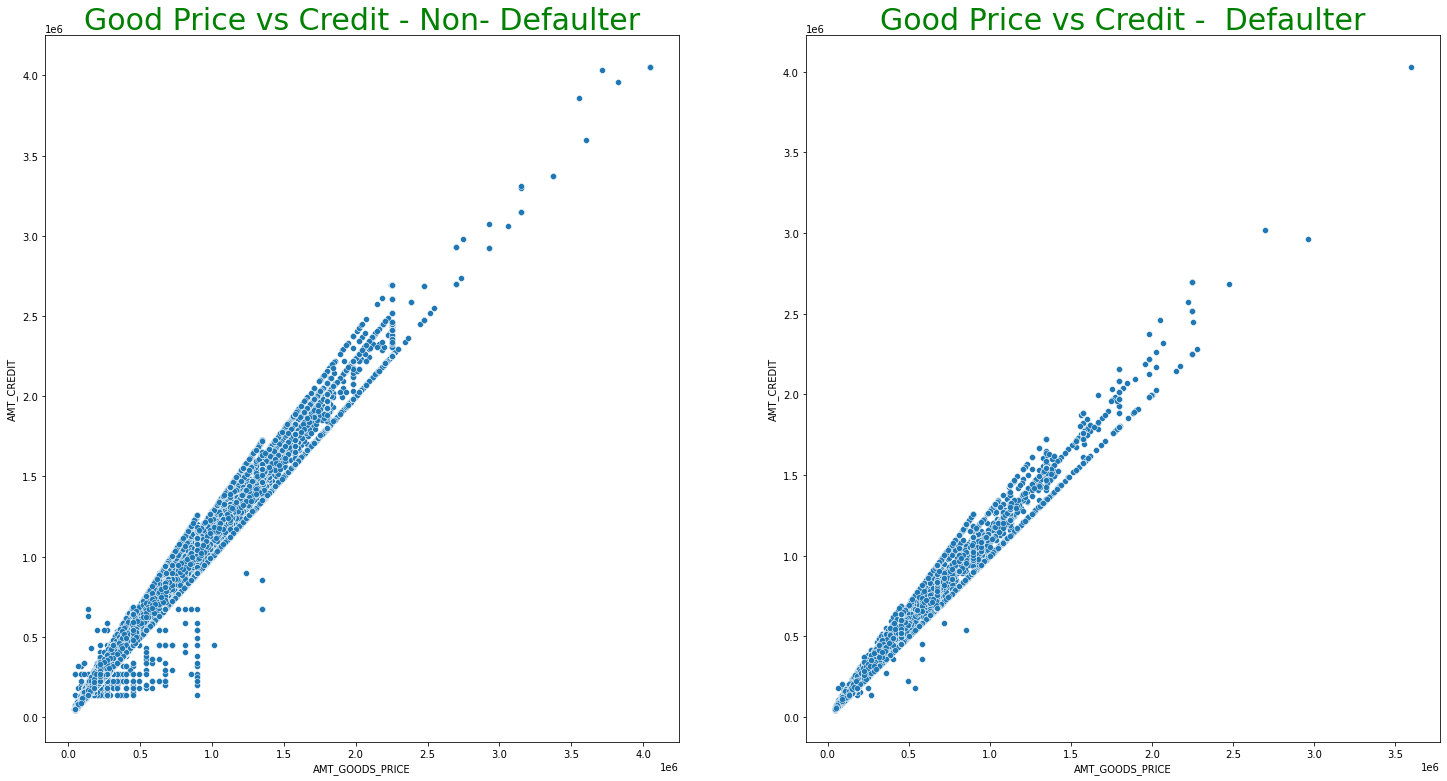

In [83]:
plt.figure(figsize=(25,13))
plt.subplot(1,2,1)
plt.title('Good Price vs Credit - Non- Defaulter', fontdict={'fontsize': 30, 'fontweight': 5,  'color':'Green'})
sns.scatterplot(x= 'AMT_GOODS_PRICE', y= 'AMT_CREDIT', data=df_ND )

plt.subplot(1,2,2)
plt.title('Good Price vs Credit -  Defaulter', fontdict={'fontsize': 30, 'fontweight': 5,  'color':'Green'})
sns.scatterplot(x= 'AMT_GOODS_PRICE', y= 'AMT_CREDIT', data=df_D )

plt.show()

### Education type vs Credit

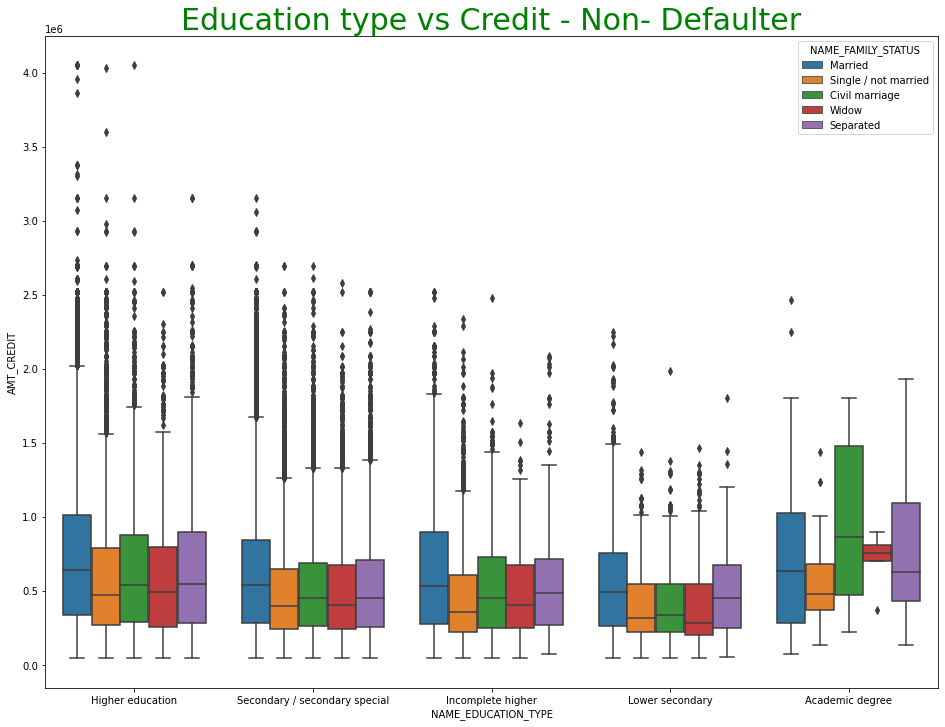

In [84]:
plt.figure(figsize=(16,12))

plt.title('Education type vs Credit - Non- Defaulter', fontdict={'fontsize': 30, 'fontweight': 5,  'color':'Green'})
sns.boxplot(x= 'NAME_EDUCATION_TYPE', y= 'AMT_CREDIT', hue ='NAME_FAMILY_STATUS',data=df_ND)

plt.show()

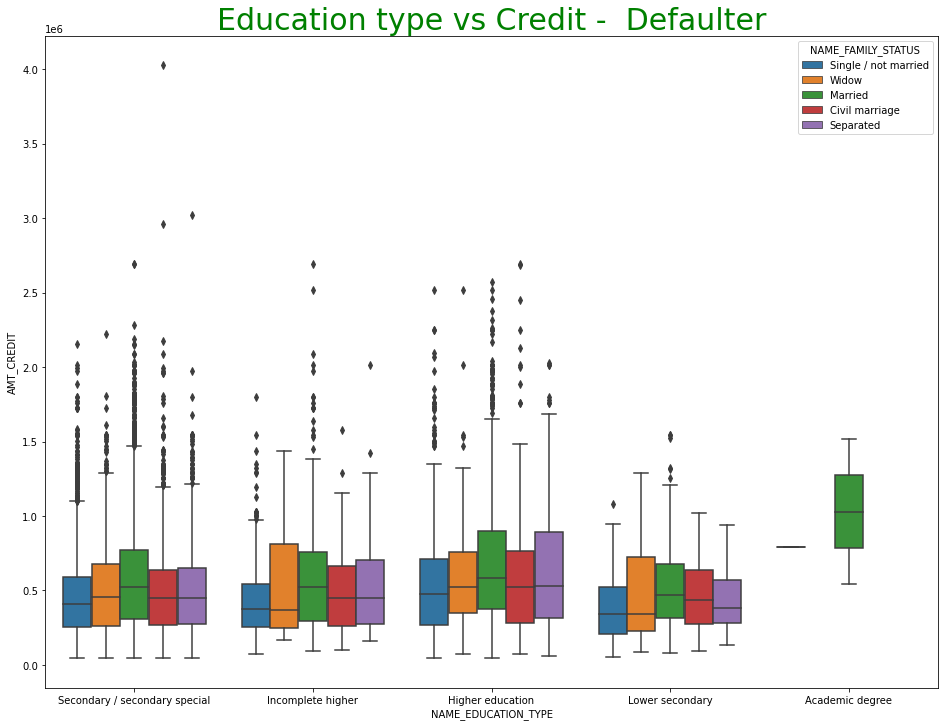

In [85]:
plt.figure(figsize=(16,12))


plt.title('Education type vs Credit -  Defaulter', fontdict={'fontsize': 30, 'fontweight': 5,  'color':'Green'})
sns.boxplot(x= 'NAME_EDUCATION_TYPE', y= 'AMT_CREDIT', hue ='NAME_FAMILY_STATUS', data=df_D )

plt.show()

Lower secondary equcated people are least defaluter and people having Academic degree never defaluted.

### House type vs Credit

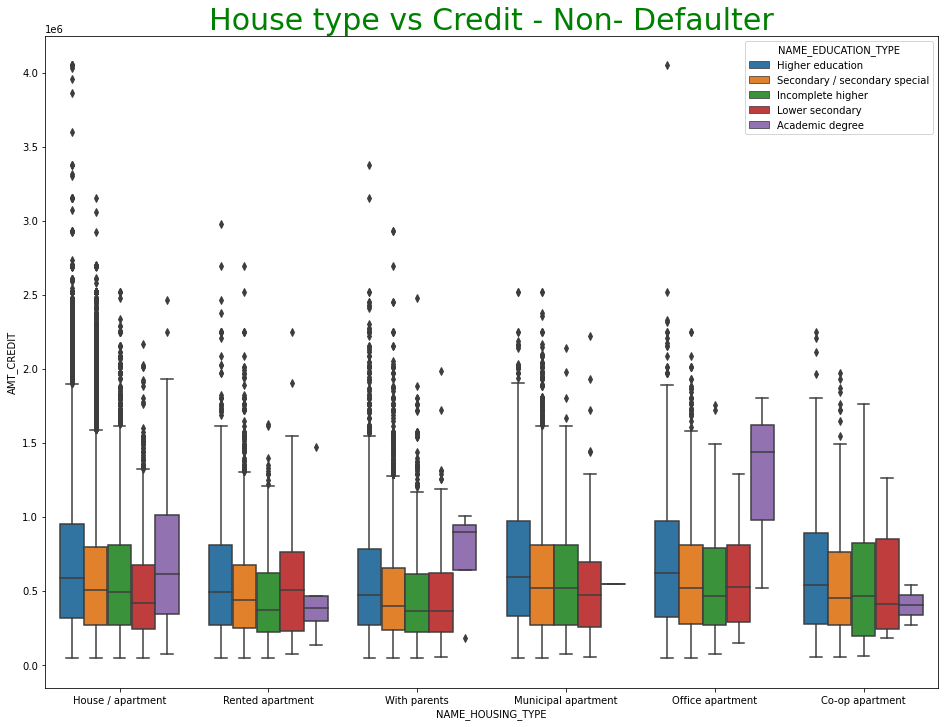

In [86]:
plt.figure(figsize=(16,12))

plt.title('House type vs Credit - Non- Defaulter', fontdict={'fontsize': 30, 'fontweight': 5,  'color':'Green'})
sns.boxplot(x= 'NAME_HOUSING_TYPE', y= 'AMT_CREDIT', hue ='NAME_EDUCATION_TYPE',data=df_ND)

plt.show()

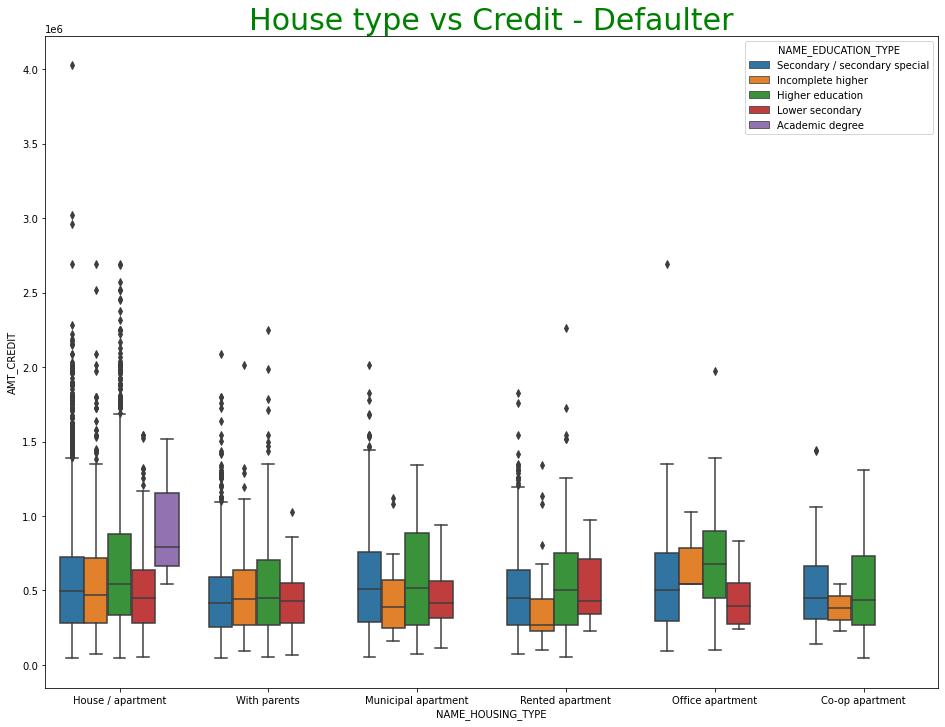

In [87]:
plt.figure(figsize=(16,12))

plt.title('House type vs Credit - Defaulter', fontdict={'fontsize': 30, 'fontweight': 5,  'color':'Green'})
sns.boxplot(x= 'NAME_HOUSING_TYPE', y= 'AMT_CREDIT', hue ='NAME_EDUCATION_TYPE',data=df_D)


plt.show()

### Income type vs Credit

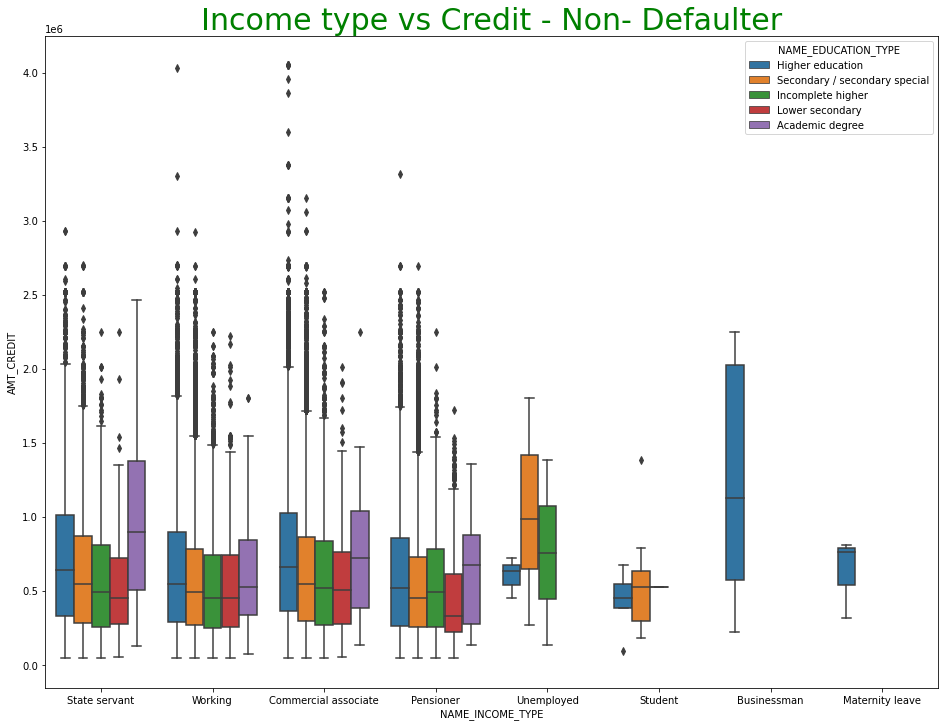

In [88]:
plt.figure(figsize=(16,12))

plt.title('Income type vs Credit - Non- Defaulter', fontdict={'fontsize': 30, 'fontweight': 5,  'color':'Green'})
sns.boxplot(x= 'NAME_INCOME_TYPE', y= 'AMT_CREDIT', hue ='NAME_EDUCATION_TYPE',data=df_ND)

plt.show()

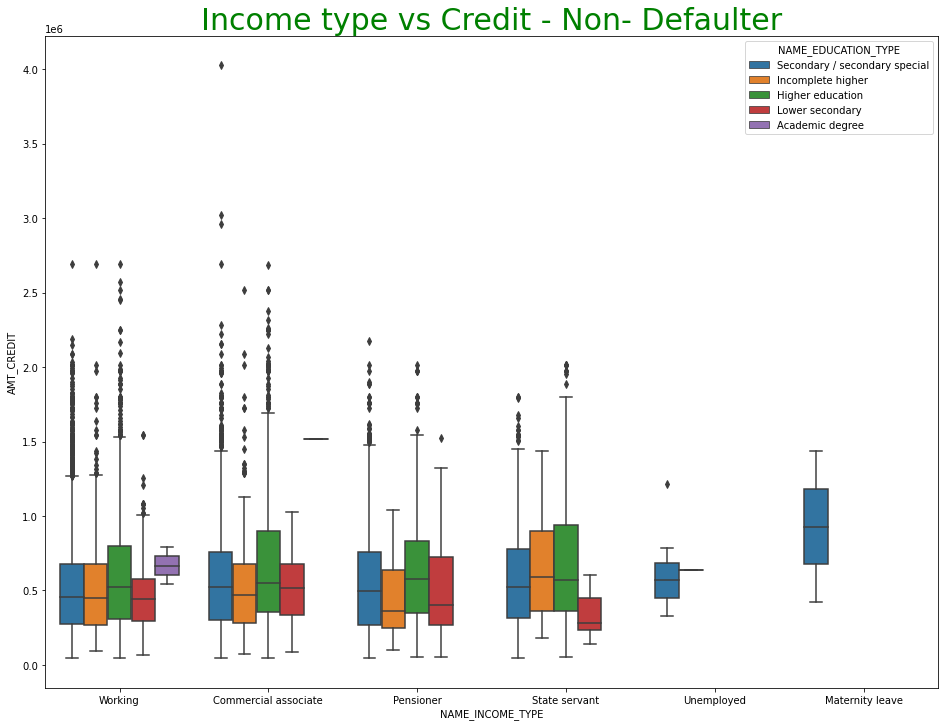

In [89]:
plt.figure(figsize=(16,12))

plt.title('Income type vs Credit - Non- Defaulter', fontdict={'fontsize': 30, 'fontweight': 5,  'color':'Green'})
sns.boxplot(x= 'NAME_INCOME_TYPE', y= 'AMT_CREDIT', hue ='NAME_EDUCATION_TYPE',data=df_D)

plt.show()

Students and business men never default but people on maternity leave are increased in number as compared to Non defaulter.

## Correlation

In [138]:
### Numerical cols

num_cols = df_D.describe().columns

In [139]:
num_cols


Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

### Correlation for Defaulters

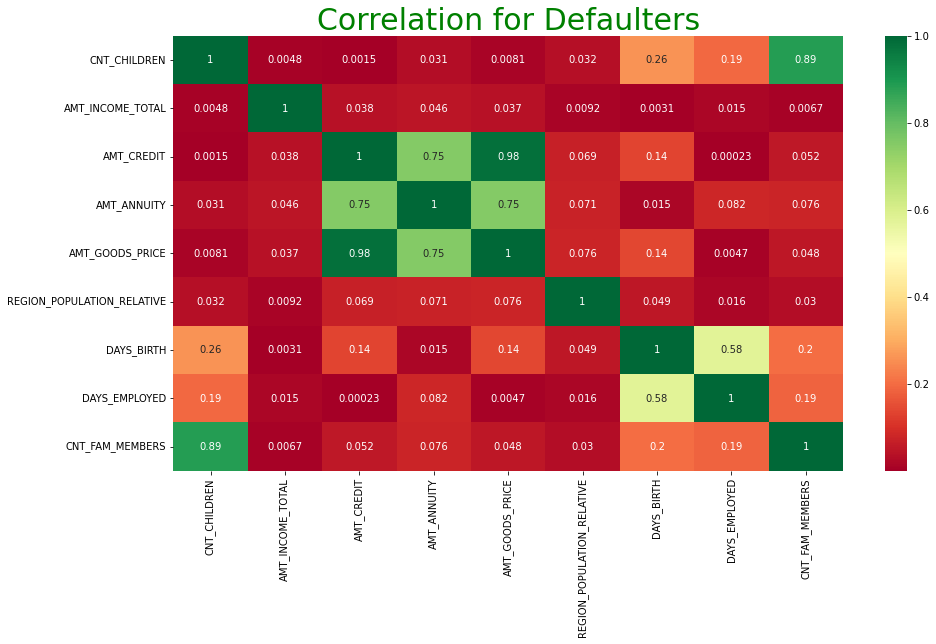

In [173]:
plt.figure(figsize=(15,8))

plt.title('Correlation for Defaulters', fontdict={'fontsize': 30, 'fontweight': 5,  'color':'Green'})

sns.heatmap(df_D[['CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
      'DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS',]].corr().abs(), annot=True, cmap='RdYlGn')
plt.show()

In [169]:
Corr_D= df_D[['CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
      'DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS',]].corr().abs().unstack().sort_values(ascending=False)

In [170]:
Corr_D

CNT_CHILDREN                CNT_CHILDREN                  1.000000
AMT_INCOME_TOTAL            AMT_INCOME_TOTAL              1.000000
DAYS_EMPLOYED               DAYS_EMPLOYED                 1.000000
DAYS_BIRTH                  DAYS_BIRTH                    1.000000
REGION_POPULATION_RELATIVE  REGION_POPULATION_RELATIVE    1.000000
                                                            ...   
DAYS_BIRTH                  AMT_INCOME_TOTAL              0.003076
CNT_CHILDREN                AMT_CREDIT                    0.001534
AMT_CREDIT                  CNT_CHILDREN                  0.001534
                            DAYS_EMPLOYED                 0.000230
DAYS_EMPLOYED               AMT_CREDIT                    0.000230
Length: 81, dtype: float64

In [171]:
Corr_D = Corr_D[Corr_D != 1].head(20)

### Top 10 Correlation for Defaulters

In [172]:
Corr_D[::2]

AMT_CREDIT       AMT_GOODS_PRICE    0.983065
CNT_FAM_MEMBERS  CNT_CHILDREN       0.885556
AMT_GOODS_PRICE  AMT_ANNUITY        0.752206
AMT_ANNUITY      AMT_CREDIT         0.751400
DAYS_BIRTH       DAYS_EMPLOYED      0.575949
                 CNT_CHILDREN       0.258889
CNT_FAM_MEMBERS  DAYS_BIRTH         0.203105
CNT_CHILDREN     DAYS_EMPLOYED      0.192111
CNT_FAM_MEMBERS  DAYS_EMPLOYED      0.186342
AMT_GOODS_PRICE  DAYS_BIRTH         0.137117
dtype: float64

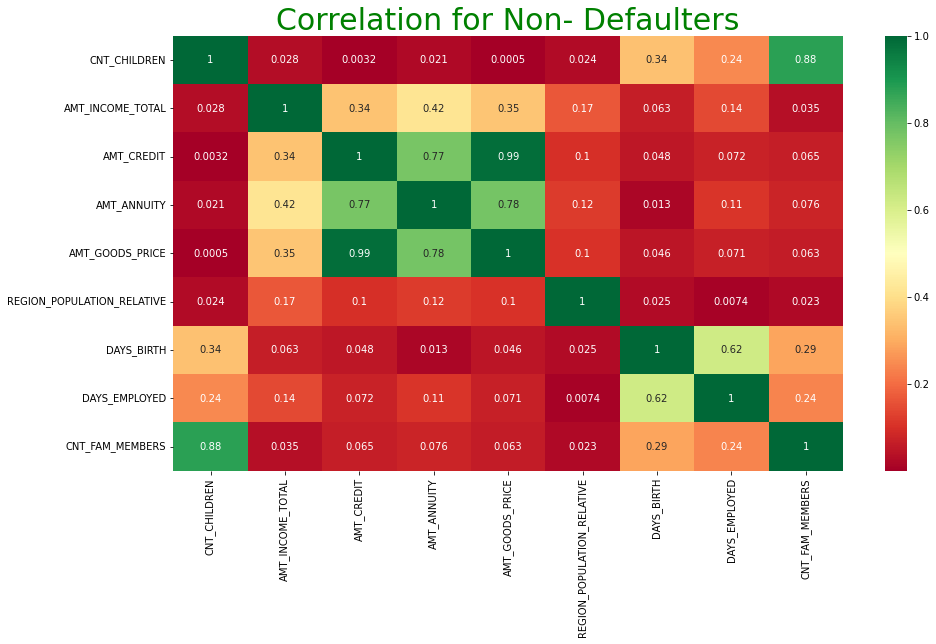

In [176]:
plt.figure(figsize=(15,8))

plt.title('Correlation for Non- Defaulters', fontdict={'fontsize': 30, 'fontweight': 5,  'color':'Green'})

sns.heatmap(df_ND[['CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
      'DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS',]].corr().abs(), annot=True, cmap='RdYlGn')
plt.show()

It's showen that there is a strong Correlation between Goods Price and Credit. Family menbers and CNT_Children also have strong correlation.

In [177]:
Corr_ND= df_ND[['CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
      'DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS',]].corr().abs().unstack().sort_values(ascending=False)

### Top 10 Correlation for Non- Defaulters

In [178]:
Corr_ND = Corr_ND[Corr_ND != 1].head(20)
Corr_ND[::2]

AMT_CREDIT        AMT_GOODS_PRICE     0.987260
CNT_FAM_MEMBERS   CNT_CHILDREN        0.878681
AMT_GOODS_PRICE   AMT_ANNUITY         0.775838
AMT_ANNUITY       AMT_CREDIT          0.770379
DAYS_BIRTH        DAYS_EMPLOYED       0.618068
AMT_ANNUITY       AMT_INCOME_TOTAL    0.417676
AMT_GOODS_PRICE   AMT_INCOME_TOTAL    0.347984
AMT_INCOME_TOTAL  AMT_CREDIT          0.341478
CNT_CHILDREN      DAYS_BIRTH          0.337664
CNT_FAM_MEMBERS   DAYS_BIRTH          0.286655
dtype: float64

## Importing Previous Application Data

In [179]:
df_P= pd.read_csv('previous_application.csv')

## Check the Data

In [180]:
df_P.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
df_P.shape

(1670214, 37)

In [182]:
df_P.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## Data Cleaning and removing missing values

In [184]:
missing = df_P.isna().sum()/len(df_P)*100

### Removing columns having NA percentage more then 40%

In [185]:
missing.sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [186]:
missing_col = list( missing[missing>40].index)

In [187]:
missing_col

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [188]:
df_P.drop(missing_col, axis=1, inplace=True) 

In [189]:
df_P.shape

(1670214, 26)

In [190]:
mis_2= (df_P.isna().sum()/len(df_P))*100

#### Data Filling 

In [191]:
mis_col2 = list( mis_2[mis_2>20].index)

In [192]:
mis_col2

['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']

In [193]:
df_P[mis_col2].mean()

AMT_ANNUITY         15955.120659
AMT_GOODS_PRICE    227847.279283
CNT_PAYMENT            16.054082
dtype: float64

In [194]:
df_P[mis_col2].median()

AMT_ANNUITY         11250.0
AMT_GOODS_PRICE    112320.0
CNT_PAYMENT            12.0
dtype: float64

In [195]:
df_P[mis_col2].mode()

,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_PAYMENT
0,2250.0,45000.0,12.0


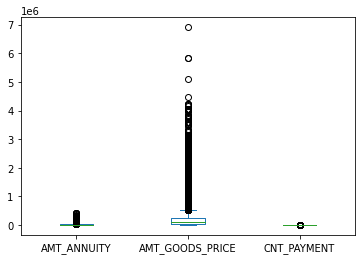

In [196]:
df_P[mis_col2].plot.box()
plt.show()

#### Replacing the NA values with median as AMT_goods_Price and AMT_Annuity has some outliers 

In [197]:
df_P[mis_col2[0]].fillna(11250.0, inplace=True)
df_P[mis_col2[1]].fillna(112320.0, inplace=True)
df_P[mis_col2[2]].fillna(12.0, inplace=True)

In [198]:
df_P.isna().sum()/len(df_P)*100

SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
AMT_ANNUITY                    0.000000
AMT_APPLICATION                0.000000
AMT_CREDIT                     0.000060
AMT_GOODS_PRICE                0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NAME_CONTRACT_STATUS           0.000000
DAYS_DECISION                  0.000000
NAME_PAYMENT_TYPE              0.000000
CODE_REJECT_REASON             0.000000
NAME_CLIENT_TYPE               0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_PORTFOLIO                 0.000000
NAME_PRODUCT_TYPE              0.000000
CHANNEL_TYPE                   0.000000
SELLERPLACE_AREA               0.000000
NAME_SELLER_INDUSTRY           0.000000
CNT_PAYMENT                    0.000000
NAME_YIELD_GROUP               0.000000


### Droping Rows having NA in Product Combination column 

In [199]:
df_P=df_P[~df_P['PRODUCT_COMBINATION'].isna()]

In [200]:
df_P.isna().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

In [201]:
df_P.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
Name: NAME_CONTRACT_TYPE, dtype: int64

In [202]:
df_P.NAME_PRODUCT_TYPE.value_counts()

XNA        1063320
x-sell      456287
walk-in     150261
Name: NAME_PRODUCT_TYPE, dtype: int64

### Replacing XNA to NaN

In [203]:
df_P=df_P.replace('XNA',np.NaN)

In [204]:
df_P.NAME_PRODUCT_TYPE.value_counts()

x-sell     456287
walk-in    150261
Name: NAME_PRODUCT_TYPE, dtype: int64

In [205]:
df_P.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,NaN,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,NaN,Cash,x-sell,Contact center,-1,NaN,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,NaN,Cash,walk-in,Credit and cash offices,-1,NaN,24.0,high,Cash Street: high


# Merging both the files

In [206]:
new_df = pd.merge(df, df_P, how='inner', on=['SK_ID_CURR'])

## Data Chacking

In [207]:
new_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,New,Vehicles,POS,NaN,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Furniture,POS,NaN,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Consumer Electronics,POS,NaN,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,New,Mobile,POS,NaN,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [208]:
new_df.shape

(1404813, 102)

In [209]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1404813 entries, 0 to 1404812
Columns: 102 entries, SK_ID_CURR to PRODUCT_COMBINATION
dtypes: category(3), float64(25), int64(47), object(27)
memory usage: 1.1+ GB


## Analysis

### Univariate Analysis

### Client Type

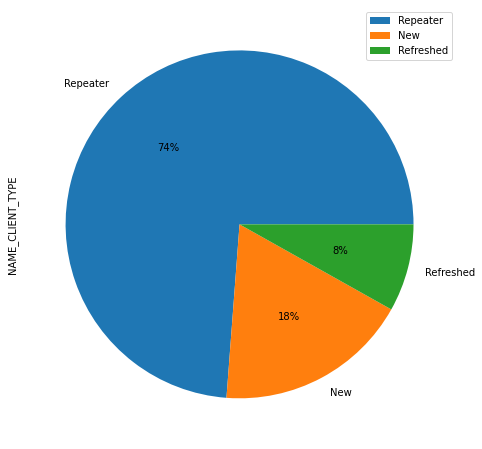

In [210]:
(df_P.NAME_CLIENT_TYPE.value_counts(normalize=True)*100).plot.pie(figsize=(19,8), autopct='%1.f%%')
plt.legend()
plt.show()


Repeater customer are more who apply for loan.

### Contract Status

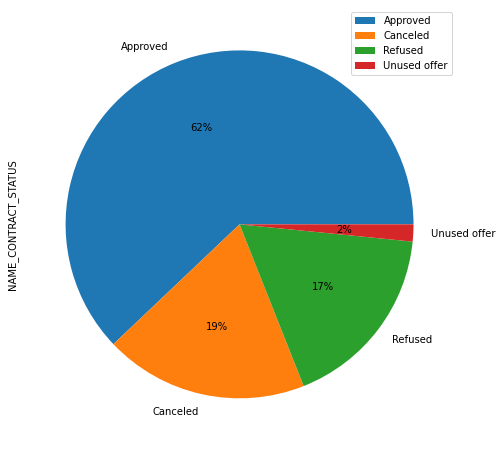

In [211]:
(df_P.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100).plot.pie(figsize=(19,8), autopct='%1.f%%')
plt.legend()
plt.show()

62% of customer are approved who apply for loan.

In [214]:
new_df.CODE_GENDER.value_counts(normalize=True)*100

F    67.552906
M    32.447094
Name: CODE_GENDER, dtype: float64

### Gender vs Contract Status

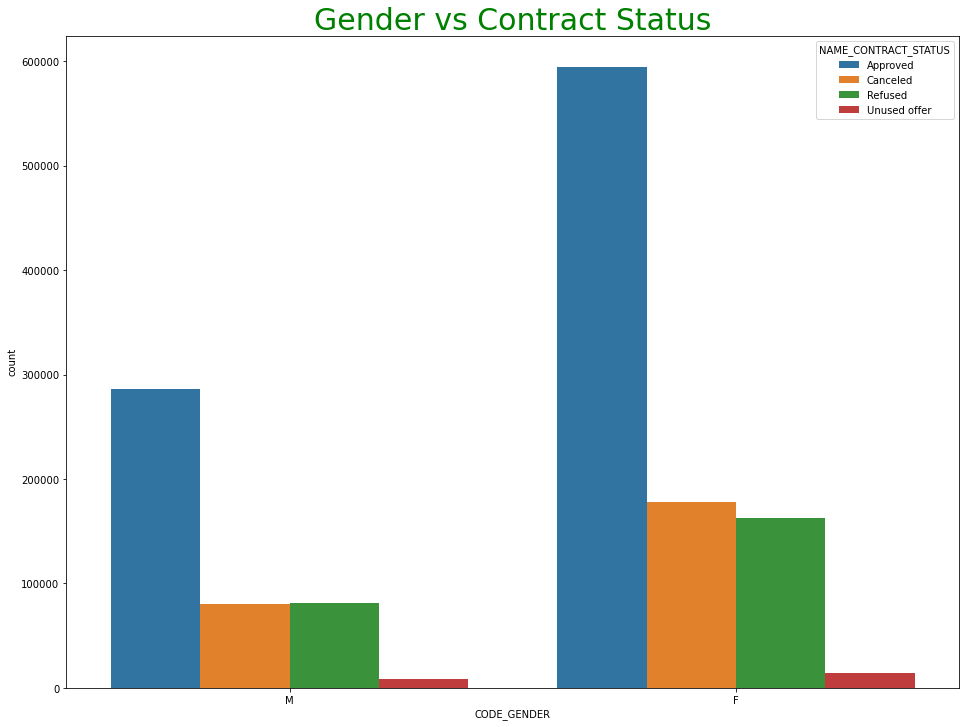

In [223]:
plt.figure(figsize=(16,12))

plt.title('Gender vs Contract Status', fontdict={'fontsize': 30, 'fontweight': 5,  'color':'Green'})
sns.countplot(x= 'CODE_GENDER', hue ='NAME_CONTRACT_STATUS', data=new_df)

plt.show()

Females are more in number so Loan approved by females are more.

### Target vs Client Type

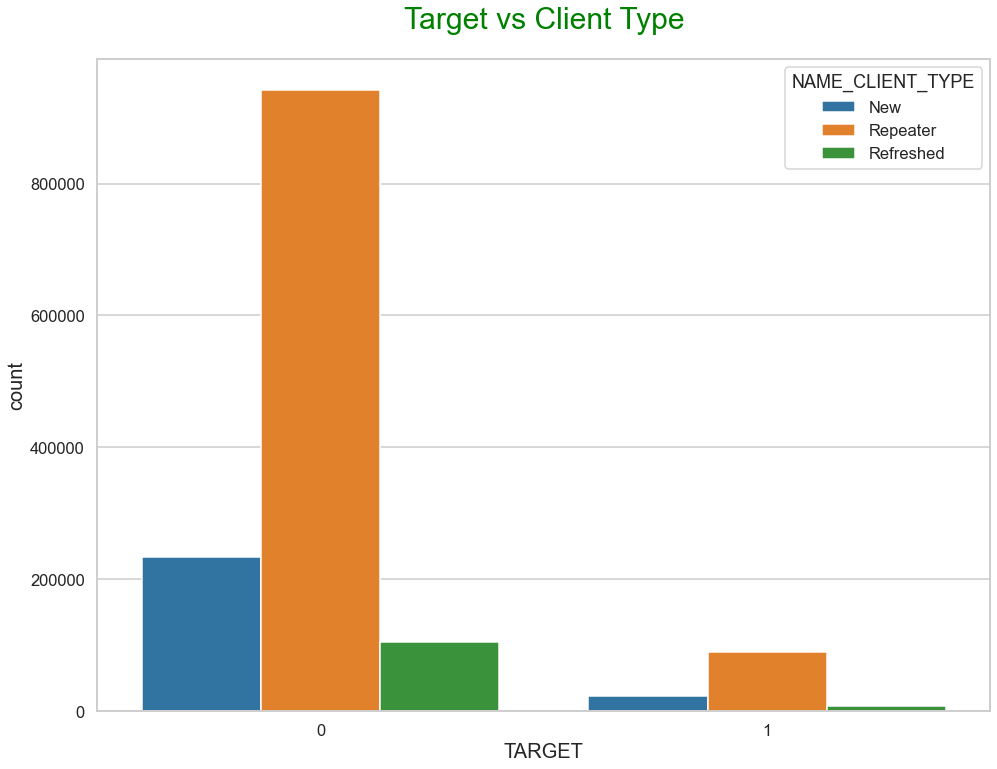

In [278]:
plt.figure(figsize=(16,12))

plt.title('Target vs Client Type', fontdict={'fontsize': 30, 'fontweight': 5,  'color':'Green'})
sns.countplot(x= 'TARGET', hue ='NAME_CLIENT_TYPE', data=new_df)

plt.show()

There are more repeated customers who are Non-Defaulter.

### Target vs Contract Status

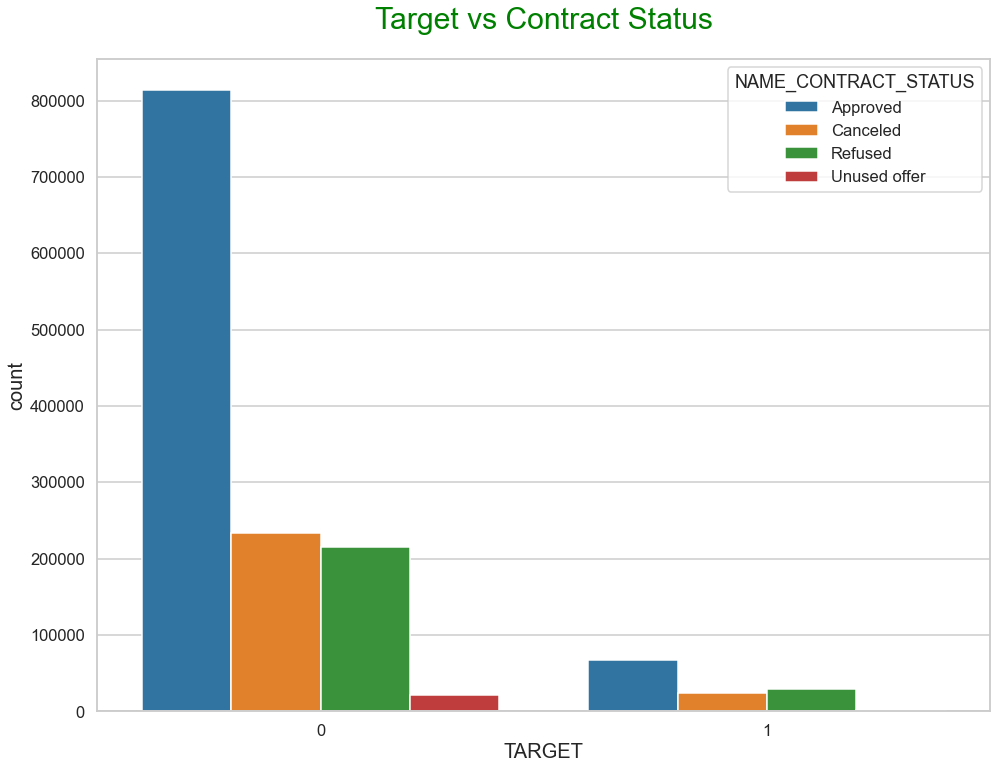

In [258]:
plt.figure(figsize=(16,12))

plt.title('Target vs Contract Status', fontdict={'fontsize': 30, 'fontweight': 5,  'color':'Green'})
sns.countplot(x= 'TARGET', hue ='NAME_CONTRACT_STATUS', data=new_df)

plt.show()

Approved customer are more who are Non-Defaulter.

### Client Type vs Contract Status

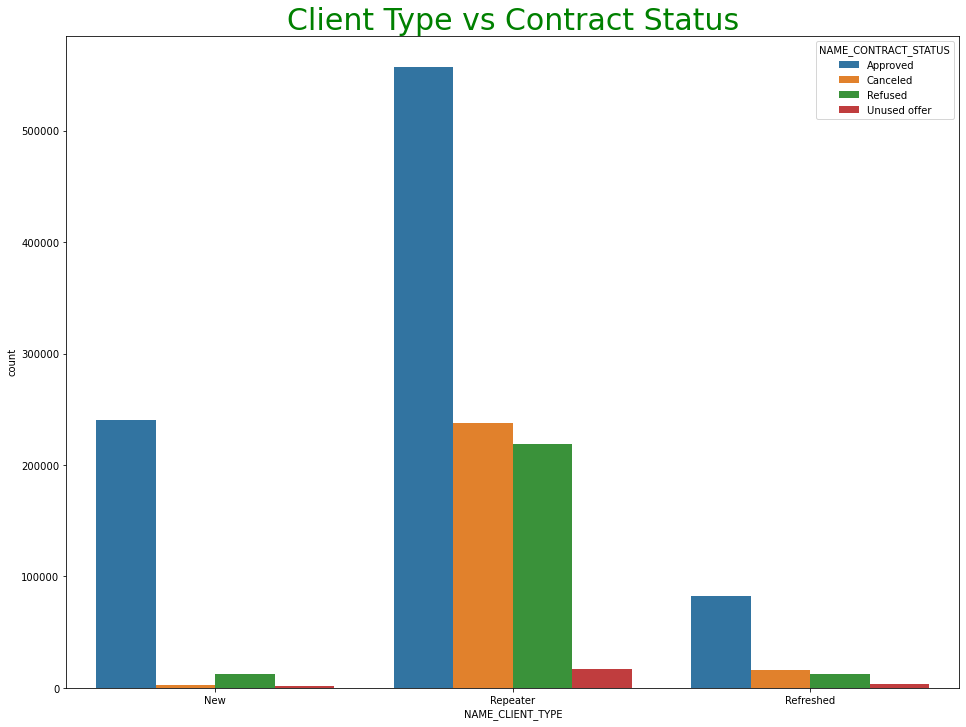

In [228]:
plt.figure(figsize=(16,12))

plt.title('Client Type vs Contract Status', fontdict={'fontsize': 30, 'fontweight': 5,  'color':'Green'})
sns.countplot(x= 'NAME_CLIENT_TYPE', hue ='NAME_CONTRACT_STATUS', data=new_df)

plt.show()

There are more repeated customers who are Approved.

### Goods Category

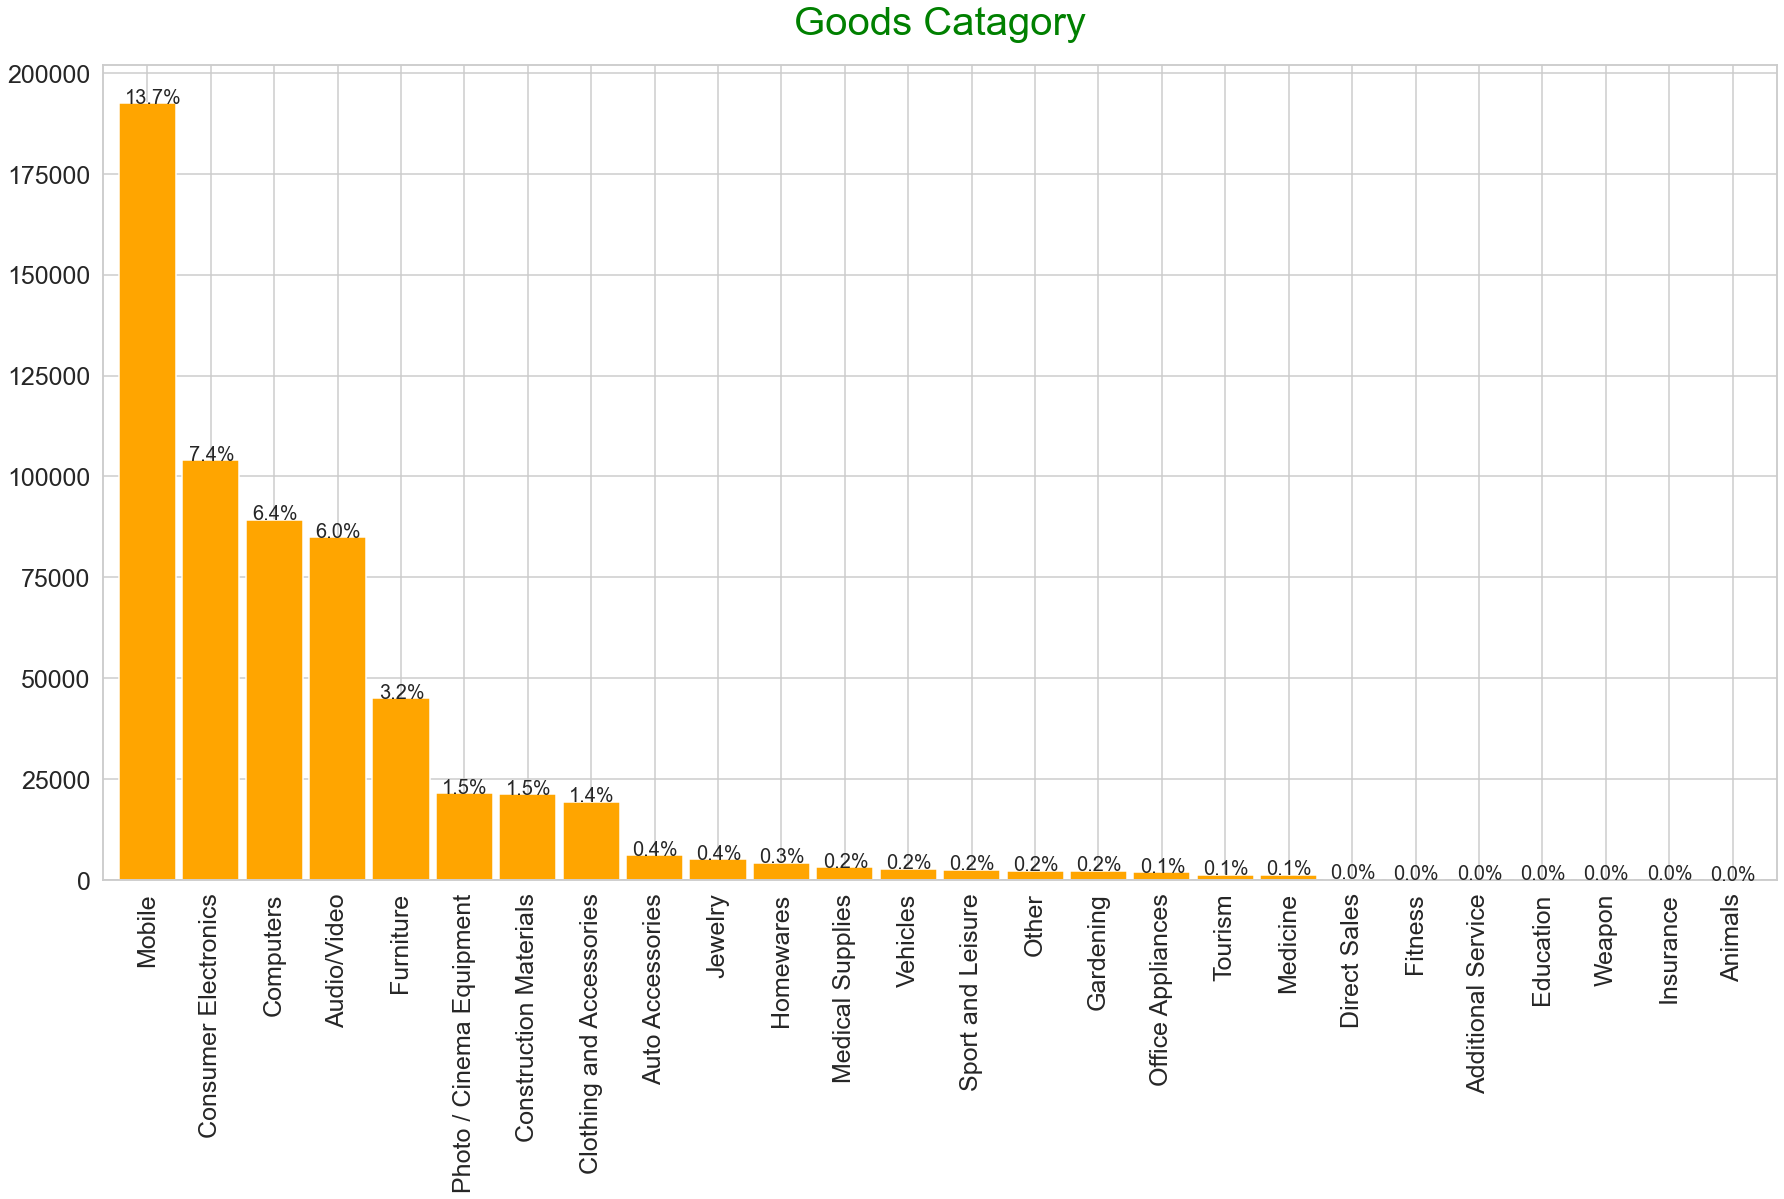

In [280]:
plt.figure(figsize=(30,15))
ax2= new_df.NAME_GOODS_CATEGORY.value_counts().plot(kind= 'bar',width= 0.9, fontsize= 25, color = 'Orange',)
plt.title('Goods Catagory', fontdict={'fontsize': 40, 'fontweight': 5,  'color':'Green'})
for p in ax2.patches:
    ax2.annotate('{:.1f}%'.format((p.get_height()/len(new_df))*100), (p.get_x()+0.1, p.get_height()+50),fontsize = 20)

plt.show()

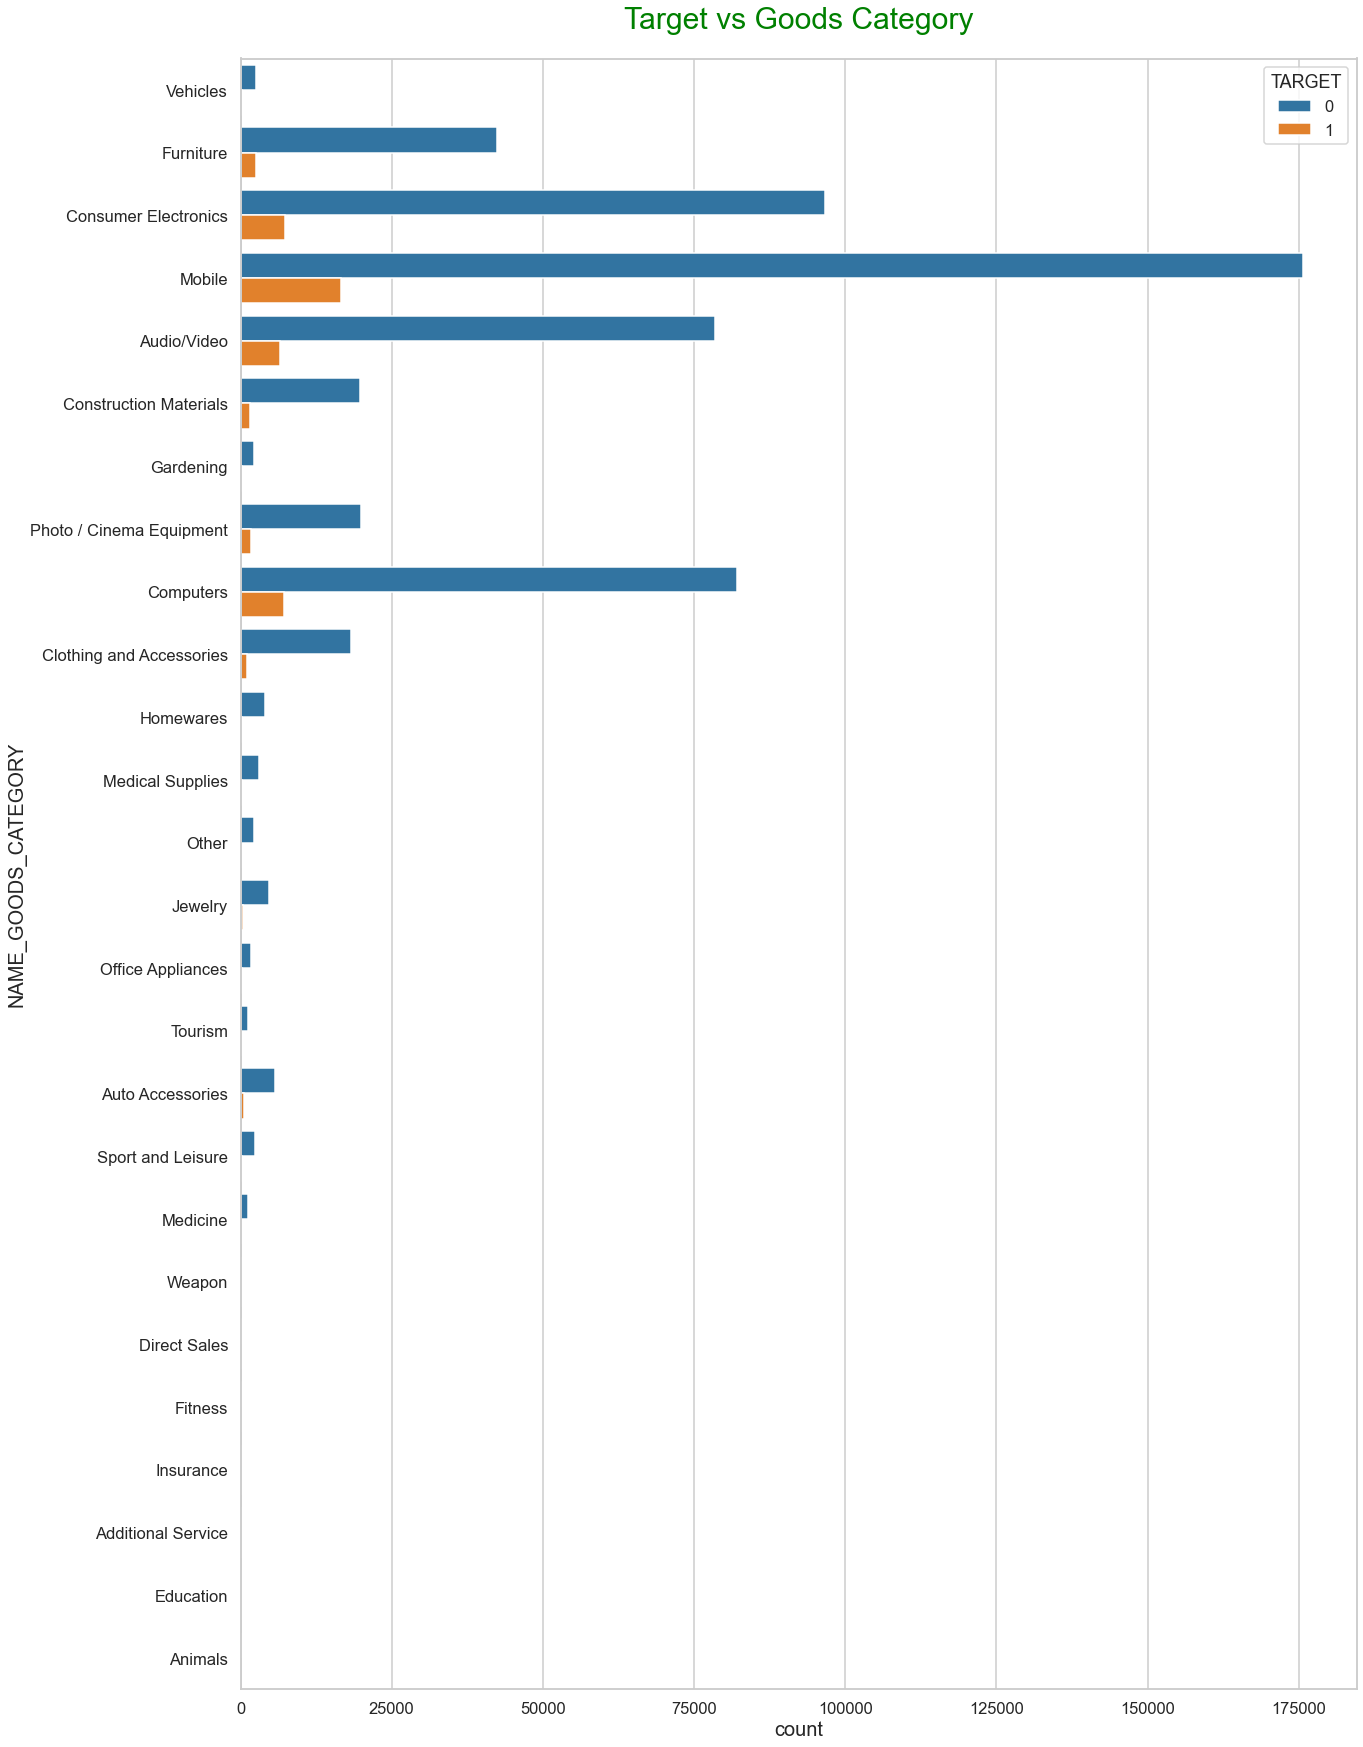

In [259]:
plt.figure(figsize=(20,30))

plt.title('Target vs Goods Category', fontdict={'fontsize': 30, 'fontweight': 5,  'color':'Green'})
sns.countplot(y= 'NAME_GOODS_CATEGORY', hue ='TARGET', data=new_df)

plt.show()

Mobile is the category on which loan is applyed most and mobile category people are the most who are Non - Defaulter

### Payment Type vs Contract Status

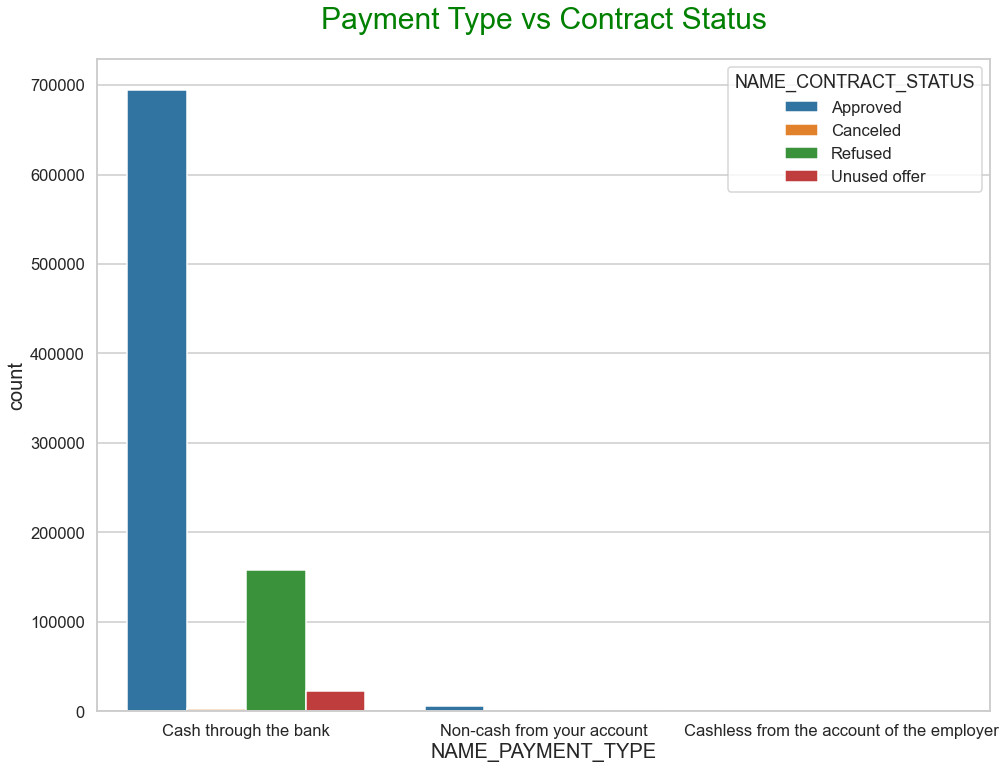

In [275]:
plt.figure(figsize=(16,12))

plt.title('Payment Type vs Contract Status', fontdict={'fontsize': 30, 'fontweight': 5,  'color':'Green'})
sns.countplot(x= 'NAME_PAYMENT_TYPE', hue ='NAME_CONTRACT_STATUS', data=new_df)

plt.show()

Mostly people pay load through Cash.

### Reason of Rejection

In [272]:
new_df=new_df.replace('XAP',np.NaN) ### Removing XAP to NaN 

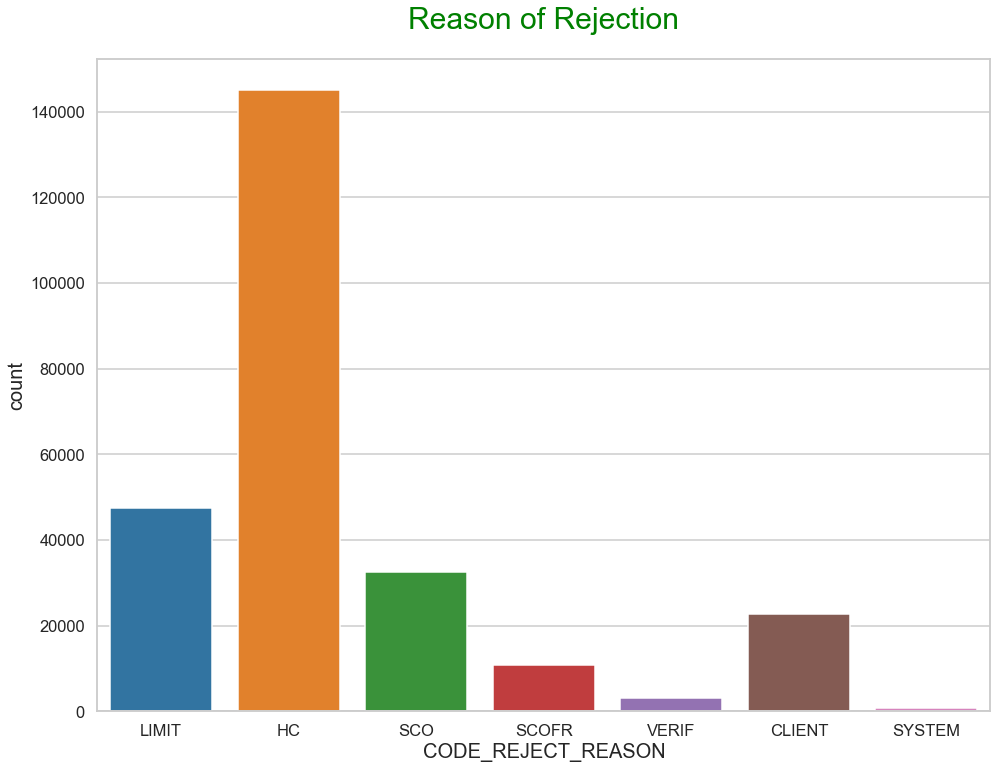

In [274]:
plt.figure(figsize=(16,12))

plt.title('Reason of Rejection', fontdict={'fontsize': 30, 'fontweight': 5,  'color':'Green'})
sns.countplot(x= 'CODE_REJECT_REASON', data=new_df)

plt.show()

Main reason of Rejection is HC.

# Observation

#### 1. Bank should focus on females as male are more defaulters.
#### 2. Age group of 30-40 Years are more risky as they are more defaulters.
#### 3. Bank should focus on Bussinuss men and students as they never defaulter and should not focus on people who are working as they are most defaulter.
#### 4. Bank should focus on  people having Academic degree and Higher Education. And they should not focus on peolpe having Secondary education as they are the most who are defaulter.
#### 5. Bank should not focus on the people who leave with Parents.
#### 6. Bank should focus on Managers and should not focus on Laborers and Drivers.
#### 7. Business Entity Type 3 are more defaulter.
#### 8. People are on maternity leave are more defaulter.
#### 9. Bank should focus on repeated customers as chance of Defaulter is less.
#### 10. Mobile is the category on which loan is applyed mostly and mobile category people are the most who are Non - Defaulter.
#### 11. Mosly People use payment mode is cash through bank.
#### 12. Main reason of loan Rejection is HC.
